In [1]:
'''
Suppresses all warning messages in the notebook to provide cleaner output during execution.
This is useful when running code that may generate non-critical warnings, ensuring that the notebook output remains uncluttered and easier to read.
'''

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''
This cell imports the 'os' module and prints the current working directory.
It helps to verify the file path context for reading or writing files in the notebook environment.
'''
import os
print(os.getcwd())

g:\DIYguru\Data-Science-and-Engineering-Analytics\Projects\Main_Project_ML\EV Charging Patterns


In [4]:
'''
Created a function 'load_data_excel' to load excel into python


import pandas as pd
import numpy as np
import os

def load_data_csv(file_path):
    """
    Load data from an csv file and return a DataFrame.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    df = pd.read_csv(file_path)
    return df

'''



'\nCreated a function \'load_data_excel\' to load excel into python\n\n\nimport pandas as pd\nimport numpy as np\nimport os\n\ndef load_data_csv(file_path):\n    """\n    Load data from an csv file and return a DataFrame.\n    """\n    if not os.path.exists(file_path):\n        raise FileNotFoundError(f"The file {file_path} does not exist.")\n    \n    df = pd.read_csv(file_path)\n    return df\n\n'

In [ ]:
'''
Loads EV charging station datasets from CSV files for two different stations using the custom load_data_csv function.
This prepares the data for further analysis and processing in subsequent steps.


# https://www.kaggle.com/datasets/datasetengineer/ev-charging-station-data-california-region?utm_source=chatgpt.com

#df1 = load_data_csv(r"G:\DIYguru\Notes and Sample Data\EV Charging Station Data- California Region\Charging station_A_Calif.csv")
df1 = load_data_csv(r"G:\DIYguru\Notes and Sample Data\EV Charging Station Data- California Region\Charging station_B__Calif.csv")
df2 = load_data_csv(r"G:\DIYguru\Notes and Sample Data\EV Charging Station Data- California Region\Charging station_C__Calif.csv")

'''

In [ ]:
'''
Concatenates the two dataframes, df1 and df2, into a single dataframe df.
This operation combines the datasets from two different EV charging stations into one unified dataset for further analysis.
The index is reset to ensure a continuous sequence after concatenation.


# concatenate the dataframes
df = pd.concat([df1, df2], ignore_index=True)
'''

In [5]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import boto3
from io import BytesIO

load_dotenv()

### S3 Bucket Configuration

bucket_name = 's3aravindh973515031797'
DATA_DIR = 'EV Charging Station/Charging_data.parquet'

### AWS S3 Client Configuration

s3 = boto3.client("s3",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    region_name=os.getenv("AWS_DEFAULT_REGION")
)

### S3 Parquet File Reader

def read_parquet_from_s3(bucket_name, object_key):
        """
        Reads a Parquet file from an AWS S3 bucket using the global s3 client.

        Args:
            bucket_name: Name of the S3 bucket.
            object_key: Key (path) to the Parquet file in the S3 bucket.

        Returns:
            DataFrame containing the Parquet data.
        """
        response = s3.get_object(Bucket=bucket_name, Key=object_key)
        file_content = response['Body'].read()
        df = pd.read_parquet(BytesIO(file_content))
        return df

### Load Dataset

df = read_parquet_from_s3(bucket_name, DATA_DIR)

In [6]:
'''
Checked unique values in both the dataframe
'''

for i in df.columns:
    print(f"Unique values in column '{i}':")
    print(df[i].unique(),"\n")

Unique values in column 'Date':
['2021-01-01' '2021-01-02' '2021-01-03' ... '2024-05-29' '2024-05-30'
 '2024-05-31'] 

Unique values in column 'Time':
['00:00:00' '01:00:00' '02:00:00' '03:00:00' '04:00:00' '05:00:00'
 '06:00:00' '07:00:00' '08:00:00' '09:00:00' '10:00:00' '11:00:00'
 '12:00:00' '13:00:00' '14:00:00' '15:00:00' '16:00:00' '17:00:00'
 '18:00:00' '19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00'] 

Unique values in column 'EV Charging Demand (kW)':
[0.11236204 0.28521429 0.21959818 ... 0.23297838 0.07779743 0.2481701 ] 

Unique values in column 'Solar Energy Production (kW)':
[0.12538804 0.05269671 0.10503542 ... 0.04761178 0.05229399 0.00880412] 

Unique values in column 'Wind Energy Production (kW)':
[0.00910519 0.10758936 0.0439957  ... 0.13834387 0.27850439 0.18543791] 

Unique values in column 'Electricity Price ($/kWh)':
[0.13731049 0.12510459 0.10666085 ... 0.1780538  0.17047302 0.10660294] 

Unique values in column 'Grid Availability':
['Available' 'Unavaila

In [7]:
'''
Ensures that the 'Date' column in the dataframe is in datetime format.
This conversion is necessary for accurate time-based analysis and prevents errors in downstream operations that require datetime types.
Invalid parsing will result in NaT (Not a Time) for problematic entries.
'''

# fix date format for date column Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59810 entries, 0 to 59809
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    59810 non-null  datetime64[ns]
 1   Time                                    59810 non-null  object        
 2   EV Charging Demand (kW)                 59810 non-null  float64       
 3   Solar Energy Production (kW)            59810 non-null  float64       
 4   Wind Energy Production (kW)             59810 non-null  float64       
 5   Electricity Price ($/kWh)               59810 non-null  float64       
 6   Grid Availability                       59810 non-null  object        
 7   Weather Conditions                      59810 non-null  object        
 8   Battery Storage (kWh)                   59810 non-null  float64       
 9   Charging Station Capacity (kW)          59810 non-

In [9]:
df.head()

,Date,Time,EV Charging Demand (kW),Solar Energy Production (kW),Wind Energy Production (kW),Electricity Price ($/kWh),Grid Availability,Weather Conditions,Battery Storage (kWh),Charging Station Capacity (kW),...,Grid Stability Index,Carbon Emissions (kgCO2/kWh),Power Outages (hours),Energy Savings ($),Total Renewable Energy Production (kW),Effective Charging Capacity (kW),Adjusted Charging Demand (kW),Net Energy Cost ($),Carbon Footprint Reduction (kgCO2),Renewable Energy Efficiency
0,2021-01-01,00:00:00,0.112362,0.125388,0.009105,0.137310,Available,Partly Cloudy,16.532408,21.763422,...,0.731147,0.274944,1.889209,4.562581,0.134493,21.181550,0.028134,0.015428,0.023158,0.006350
1,2021-01-01,01:00:00,0.285214,0.052697,0.107589,0.125105,Available,Sunny,39.106930,31.215028,...,1.494387,0.481251,0.277371,0.215104,0.160286,27.639943,0.158721,0.035682,0.060875,0.005799
2,2021-01-01,02:00:00,0.219598,0.105035,0.043996,0.106661,Available,Cloudy,6.112691,46.489116,...,1.109293,0.146079,0.642644,0.029969,0.149031,41.781150,0.175614,0.023423,0.006425,0.003567
3,2021-01-01,03:00:00,0.179598,0.073839,0.275727,0.072209,Available,Partly Cloudy,30.041088,49.675029,...,0.847219,0.475255,0.546680,1.384950,0.349567,46.078097,0.004072,0.012969,0.083420,0.007586
4,2021-01-01,04:00:00,0.046806,0.068614,0.059824,0.091090,Available,Partly Cloudy,45.085422,21.166182,...,1.452466,0.319261,1.935850,1.872170,0.128438,17.733986,0.045315,0.004264,0.000476,0.007242


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalize (Min-Max)
scaler_minmax = MinMaxScaler()
df['EV Charging Efficiency (%) - Normalized'] = scaler_minmax.fit_transform(df[['EV Charging Efficiency (%)']]).round(2)

In [11]:
df_charging_efficiency = df.groupby(df['Date'].dt.to_period('M'))['EV Charging Efficiency (%)'].mean().reset_index()
df_charging_efficiency

,Date,EV Charging Efficiency (%)
0,2021-01,89.958806
1,2021-02,90.056477
2,2021-03,90.175206
3,2021-04,89.981847
4,2021-05,90.069777
5,2021-06,89.442198
6,2021-07,89.931319
7,2021-08,90.345421
8,2021-09,90.017416
9,2021-10,90.166764


In [12]:
df_charging_efficiency = df.groupby(df['Date'].dt.to_period('M'))['EV Charging Efficiency (%) - Normalized'].mean().reset_index()
df_charging_efficiency

,Date,EV Charging Efficiency (%) - Normalized
0,2021-01,0.498051
1,2021-02,0.502976
2,2021-03,0.508737
3,2021-04,0.498958
4,2021-05,0.503333
5,2021-06,0.472111
6,2021-07,0.496546
7,2021-08,0.517245
8,2021-09,0.500847
9,2021-10,0.508239


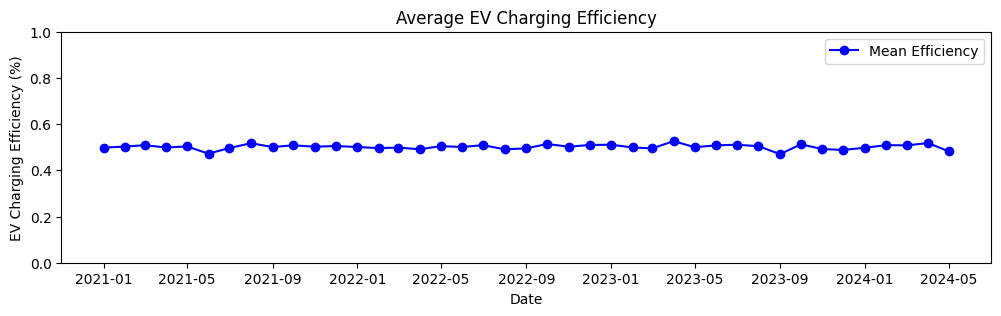

In [13]:
'''
Plot the average EV charging efficiency over time using a line plot.
'''

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.plot(df_charging_efficiency['Date'].dt.to_timestamp(), df_charging_efficiency['EV Charging Efficiency (%) - Normalized'], color='blue', marker='o', label='Mean Efficiency')
plt.ylim(0, 1)  # Normalized values between 0 and 1
plt.title('Average EV Charging Efficiency')
plt.xlabel('Date')
plt.ylabel('EV Charging Efficiency (%)')
plt.legend()
plt.show()

In [14]:
df['Weather Conditions'].unique()

array(['Partly Cloudy', 'Sunny', 'Cloudy', 'Clear', 'Rainy'], dtype=object)

In [15]:
df_weather = df.groupby([df['Date'].dt.to_period('M'),'Weather Conditions'])['EV Charging Efficiency (%)'].mean().reset_index()
df_weather

,Date,Weather Conditions,EV Charging Efficiency (%)
0,2021-01,Clear,89.152133
1,2021-01,Cloudy,90.573190
2,2021-01,Partly Cloudy,89.766215
3,2021-01,Rainy,89.696676
4,2021-01,Sunny,90.589128
...,...,...,...
200,2024-05,Clear,89.773079
201,2024-05,Cloudy,89.090572
202,2024-05,Partly Cloudy,89.451986
203,2024-05,Rainy,89.995265


In [16]:
df_weather = df.groupby([df['Date'].dt.to_period('M'),'Weather Conditions'])['EV Charging Efficiency (%) - Normalized'].mean().reset_index()
df_weather

,Date,Weather Conditions,EV Charging Efficiency (%) - Normalized
0,2021-01,Clear,0.457688
1,2021-01,Cloudy,0.528839
2,2021-01,Partly Cloudy,0.488431
3,2021-01,Rainy,0.484919
4,2021-01,Sunny,0.529539
...,...,...,...
200,2024-05,Clear,0.488603
201,2024-05,Cloudy,0.454516
202,2024-05,Partly Cloudy,0.472714
203,2024-05,Rainy,0.499630


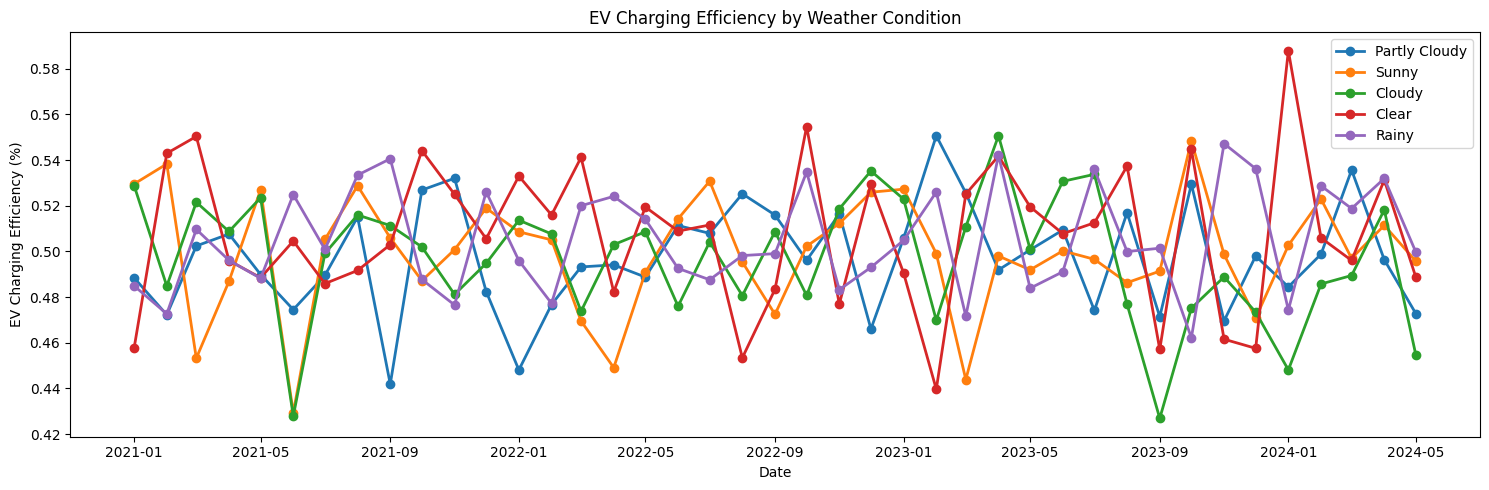

In [17]:
'''
Plot the average EV charging efficiency over time for different weather conditions using a line plot.
Each weather condition is plotted as a separate line to visualize trends and differences in efficiency.
'''

import matplotlib.pyplot as plt

# List of weather conditions to plot
weather_conditions = ['Partly Cloudy', 'Sunny', 'Cloudy', 'Clear', 'Rainy']

# Create a single plot
plt.figure(figsize=(15, 5))

# Plot each weather condition on the same axes
for i in weather_conditions:
    condition_df = df_weather[df_weather['Weather Conditions'] == i]
    plt.plot(
        condition_df['Date'].dt.to_timestamp(), 
        condition_df['EV Charging Efficiency (%) - Normalized'], 
        linewidth=2,
        marker='o',
        label=i
    )

# Chart formatting
plt.title('EV Charging Efficiency by Weather Condition')
plt.xlabel('Date')
plt.ylabel('EV Charging Efficiency (%)')
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
'''
This code processes a DataFrame `df` by:
- Converting the 'Time' column from string to datetime and extracting the hour component into a new column 'Hour'.
- Defining a function `get_day_period(hour)` to categorize each hour into a part of the day:
    - Night: 21–23 or 0–3
    - Morning: 4–11
    - Afternoon: 12–16
    - Evening: 17–20
    - Unknown: if hour is outside expected range
- Applying this function to the 'Hour' column to create a new column 'Day Period' that labels each record with its respective part of the day.
'''


import pandas as pd

# Convert 'Time' column to datetime and extract hour
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Function to determine part of the day
def get_day_period(hour):
    if 0 <= hour <= 3 or 21 <= hour <= 23:
        return 'Night'
    elif 4 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:
        return 'Unknown'  # just in case

# Apply function to assign 'Day Period'
df['Day Period'] = df['Hour'].apply(get_day_period)


In [19]:
df['Day Period'].unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Normalize (Min-Max)
scaler_minmax = MinMaxScaler()
df['EV Charging Demand (kW) - Normalized'] = scaler_minmax.fit_transform(df[['EV Charging Demand (kW)']]).round(2)

In [21]:
df_period = df.groupby([df['Date'].dt.to_period('M'),'Day Period'])['EV Charging Demand (kW)'].mean().reset_index()
df_period

,Date,Day Period,EV Charging Demand (kW)
0,2021-01,Afternoon,0.150594
1,2021-01,Evening,0.149428
2,2021-01,Morning,0.146796
3,2021-01,Night,0.147207
4,2021-02,Afternoon,0.142247
...,...,...,...
159,2024-04,Night,0.152574
160,2024-05,Afternoon,0.139622
161,2024-05,Evening,0.155982
162,2024-05,Morning,0.146877


In [22]:
df_period = df.groupby([df['Date'].dt.to_period('M'),'Day Period'])['EV Charging Demand (kW) - Normalized'].mean().reset_index()
df_period

,Date,Day Period,EV Charging Demand (kW) - Normalized
0,2021-01,Afternoon,0.501742
1,2021-01,Evening,0.498065
2,2021-01,Morning,0.489556
3,2021-01,Night,0.490922
4,2021-02,Afternoon,0.474214
...,...,...,...
159,2024-04,Night,0.508667
160,2024-05,Afternoon,0.464933
161,2024-05,Evening,0.519500
162,2024-05,Morning,0.489667


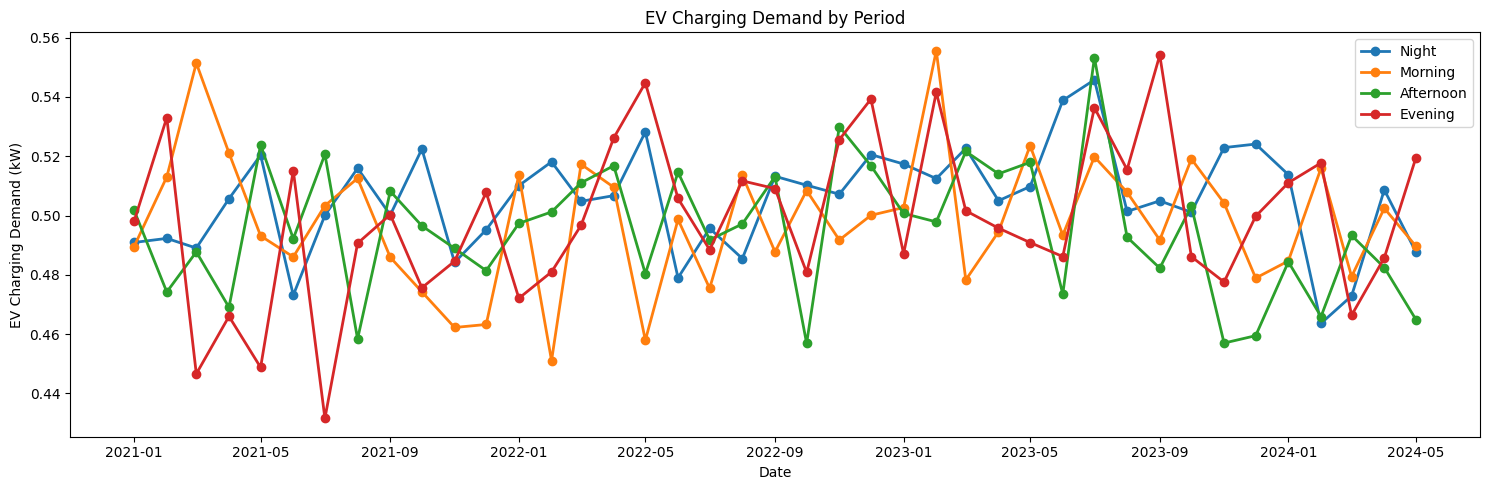

In [23]:
'''
Plot the average EV charging demand over time for different periods of the day using a line plot.
Each period (Night, Morning, Afternoon, Evening) is plotted as a separate line to visualize trends and differences in demand.
'''

import matplotlib.pyplot as plt

# List of periods conditions to plot
period = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a single plot
plt.figure(figsize=(15, 5))

# Plot each periods condition on the same axes
for i in period:
    condition_df = df_period[df_period['Day Period'] == i]
    plt.plot(
        condition_df['Date'].dt.to_timestamp(), 
        condition_df['EV Charging Demand (kW) - Normalized'], 
        linewidth=2,
        marker='o',
        label=i
    )

# Chart formatting
plt.title('EV Charging Demand by Period')
plt.xlabel('Date')
plt.ylabel('EV Charging Demand (kW)')
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Normalize (Min-Max)
scaler_minmax = MinMaxScaler()
df['Total Renewable Energy Production (kW) - Normalized'] = scaler_minmax.fit_transform(df[['Total Renewable Energy Production (kW)']]).round(2)

In [25]:
# Group by month and day period, then calculate the mean of 'Total Renewable Energy Production (kW)'
df_period = df.groupby([df['Date'].dt.to_period('M'),'Day Period'])['Total Renewable Energy Production (kW)'].mean().reset_index()
df_period

,Date,Day Period,Total Renewable Energy Production (kW)
0,2021-01,Afternoon,0.290988
1,2021-01,Evening,0.293721
2,2021-01,Morning,0.300473
3,2021-01,Night,0.296199
4,2021-02,Afternoon,0.318795
...,...,...,...
159,2024-04,Night,0.297569
160,2024-05,Afternoon,0.308193
161,2024-05,Evening,0.302174
162,2024-05,Morning,0.297947


In [26]:
# Group by month and day period, then calculate the mean of 'Total Renewable Energy Production (kW)'
df_period = df.groupby([df['Date'].dt.to_period('M'),'Day Period'])['Total Renewable Energy Production (kW) - Normalized'].mean().reset_index()
df_period

,Date,Day Period,Total Renewable Energy Production (kW) - Normalized
0,2021-01,Afternoon,0.485226
1,2021-01,Evening,0.490081
2,2021-01,Morning,0.500847
3,2021-01,Night,0.494101
4,2021-02,Afternoon,0.531857
...,...,...,...
159,2024-04,Night,0.496286
160,2024-05,Afternoon,0.513667
161,2024-05,Evening,0.504083
162,2024-05,Morning,0.496958


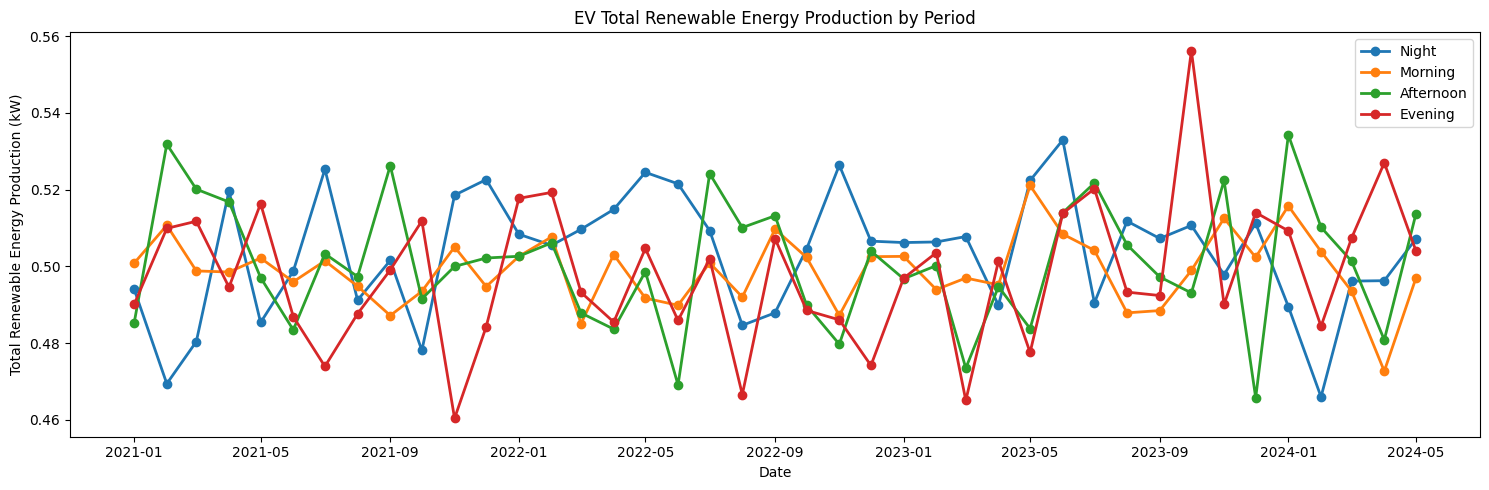

In [27]:
'''
Plot the average total renewable energy production over time for different periods of the day using a line plot.
Each period (Night, Morning, Afternoon, Evening) is plotted as a separate line to visualize trends and differences in renewable energy production.
'''

import matplotlib.pyplot as plt

# List of periods conditions to plot
period = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a single plot
plt.figure(figsize=(15, 5))

# Plot each periods condition on the same axes
for i in period:
    condition_df = df_period[df_period['Day Period'] == i]
    plt.plot(
        condition_df['Date'].dt.to_timestamp(), 
        condition_df['Total Renewable Energy Production (kW) - Normalized'], 
        linewidth=2,
        marker='o',
        label=i
    )

# Chart formatting
plt.title('EV Total Renewable Energy Production by Period')
plt.xlabel('Date')
plt.ylabel('Total Renewable Energy Production (kW)')
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
# Group by month and day period, then calculate the mean of 'Total Renewable Energy Production (kW)'
df_period = df.groupby([df['Date'].dt.to_period('M'),'Day Period'])['Total Renewable Energy Production (kW)'].mean().reset_index()
df_period

,Date,Day Period,Total Renewable Energy Production (kW)
0,2021-01,Afternoon,0.290988
1,2021-01,Evening,0.293721
2,2021-01,Morning,0.300473
3,2021-01,Night,0.296199
4,2021-02,Afternoon,0.318795
...,...,...,...
159,2024-04,Night,0.297569
160,2024-05,Afternoon,0.308193
161,2024-05,Evening,0.302174
162,2024-05,Morning,0.297947


In [29]:
import pandas as pd

def add_season_column(df, date_col='Date'):
    """
    Adds a 'Season' column to the DataFrame based on the month from a date column.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the date column.
        date_col (str): The name of the column containing datetime values.

    Returns:
        pd.DataFrame: Original DataFrame with an added 'Season' column.
    """
    # Ensure the date column is in datetime format
    df[date_col] = pd.to_datetime(df[date_col])

    # Map months to seasons
    df['Season'] = df[date_col].dt.month % 12 // 3
    season_map = {0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Autumn'}
    df['Season'] = df['Season'].map(season_map)

    return df


In [30]:
add_season_column(df, date_col='Date')

,Date,Time,EV Charging Demand (kW),Solar Energy Production (kW),Wind Energy Production (kW),Electricity Price ($/kWh),Grid Availability,Weather Conditions,Battery Storage (kWh),Charging Station Capacity (kW),...,Adjusted Charging Demand (kW),Net Energy Cost ($),Carbon Footprint Reduction (kgCO2),Renewable Energy Efficiency,EV Charging Efficiency (%) - Normalized,Hour,Day Period,EV Charging Demand (kW) - Normalized,Total Renewable Energy Production (kW) - Normalized,Season
0,2021-01-01,00:00:00,0.112362,0.125388,0.009105,0.137310,Available,Partly Cloudy,16.532408,21.763422,...,0.028134,0.015428,0.023158,0.006350,0.87,0,Night,0.37,0.22,Winter
1,2021-01-01,01:00:00,0.285214,0.052697,0.107589,0.125105,Available,Sunny,39.106930,31.215028,...,0.158721,0.035682,0.060875,0.005799,0.43,1,Night,0.95,0.27,Winter
2,2021-01-01,02:00:00,0.219598,0.105035,0.043996,0.106661,Available,Cloudy,6.112691,46.489116,...,0.175614,0.023423,0.006425,0.003567,0.49,2,Night,0.73,0.25,Winter
3,2021-01-01,03:00:00,0.179598,0.073839,0.275727,0.072209,Available,Partly Cloudy,30.041088,49.675029,...,0.004072,0.012969,0.083420,0.007586,0.64,3,Night,0.60,0.58,Winter
4,2021-01-01,04:00:00,0.046806,0.068614,0.059824,0.091090,Available,Partly Cloudy,45.085422,21.166182,...,0.045315,0.004264,0.000476,0.007242,0.19,4,Morning,0.16,0.21,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59805,2024-05-30,20:00:00,0.173522,0.144697,0.109528,0.137830,Available,Sunny,30.755102,49.248154,...,0.146345,0.023916,0.009767,0.006238,0.14,20,Evening,0.58,0.42,Spring
59806,2024-05-30,21:00:00,0.194685,0.153407,0.208440,0.171891,Available,Clear,47.379324,17.980083,...,0.156887,0.033465,0.012332,0.023265,0.33,21,Night,0.65,0.60,Spring
59807,2024-05-30,22:00:00,0.232978,0.047612,0.138344,0.178054,Available,Partly Cloudy,7.738819,17.604067,...,0.202289,0.041483,0.010963,0.013152,0.02,22,Night,0.78,0.31,Spring
59808,2024-05-30,23:00:00,0.077797,0.052294,0.278504,0.170473,Available,Partly Cloudy,45.478840,8.638068,...,0.065948,0.013262,0.003393,0.038892,0.92,23,Night,0.26,0.55,Spring


In [31]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59810 entries, 0 to 59809
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Date                                                 59810 non-null  datetime64[ns]
 1   Time                                                 59810 non-null  object        
 2   EV Charging Demand (kW)                              59810 non-null  float64       
 3   Solar Energy Production (kW)                         59810 non-null  float64       
 4   Wind Energy Production (kW)                          59810 non-null  float64       
 5   Electricity Price ($/kWh)                            59810 non-null  float64       
 6   Grid Availability                                    59810 non-null  object        
 7   Weather Conditions                                   59810 non-null  object        
 

In [33]:
# Group by month and day period, then calculate the mean of 'Total Renewable Energy Production (kW)' and EV Charging Demand (kW)   

df_season = df.groupby(['Season', 'Day Period']).agg({
    'Total Renewable Energy Production (kW)': 'mean',
    'EV Charging Demand (kW)': 'mean',
    'Electricity Price ($/kWh)': 'mean', 
    'Number of EVs Charging': 'count' ,
    'Carbon Emissions (kgCO2/kWh)': 'mean'             
}).reset_index()

df_season

,Season,Day Period,Total Renewable Energy Production (kW),EV Charging Demand (kW),Electricity Price ($/kWh),Number of EVs Charging,Carbon Emissions (kgCO2/kWh)
0,Autumn,Afternoon,0.300657,0.147820,0.125899,2730,0.298758
1,Autumn,Evening,0.299425,0.149755,0.124428,2184,0.304551
2,Autumn,Morning,0.298913,0.147508,0.124740,4368,0.297482
3,Autumn,Night,0.301947,0.152212,0.125863,3822,0.299313
4,Spring,Afternoon,0.297412,0.149607,0.124320,3670,0.295380
5,Spring,Evening,0.299107,0.147207,0.127809,2936,0.299069
6,Spring,Morning,0.297676,0.150436,0.124897,5872,0.299101
7,Spring,Night,0.302450,0.151559,0.124951,5140,0.302939
8,Summer,Afternoon,0.301831,0.149860,0.125134,2760,0.302143
9,Summer,Evening,0.295136,0.149327,0.122158,2208,0.301272


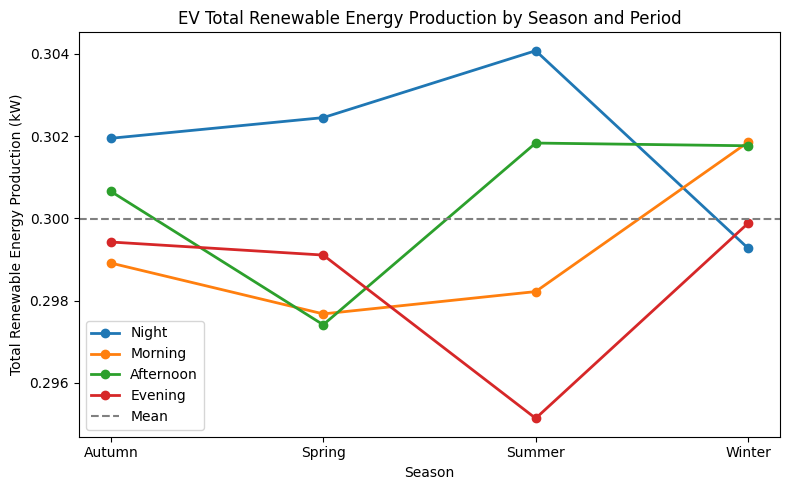

In [34]:
'''
Plot the average total renewable energy production by season and period of the day using a line plot.
Each period (Night, Morning, Afternoon, Evening) is plotted as a separate line to visualize trends and differences in renewable energy production across seasons.
A horizontal dashed line indicates the overall mean value for reference.
'''

import matplotlib.pyplot as plt

# List of seasons to plot
season = ['Winter', 'Spring', 'Summer', 'Autumn']
mean_value = df_season['Total Renewable Energy Production (kW)'].mean()
# Create a single plot
plt.figure(figsize=(8, 5))

# Plot each periods condition on the same axes
for i in period:
    condition_df = df_season[df_season['Day Period'] == i]
    plt.plot(
        condition_df['Season'], 
        condition_df['Total Renewable Energy Production (kW)'], 
        linewidth=2,
        marker='o',
        label=i
    )

# Add a horizontal mean line
plt.axhline(mean_value, color='gray', linestyle='--', linewidth=1.5, label='Mean')

# Chart formatting
plt.title('EV Total Renewable Energy Production by Season and Period')
plt.xlabel('Season')
plt.ylabel('Total Renewable Energy Production (kW)')
plt.legend()
plt.tight_layout()
plt.show()

The image shows how **total renewable energy production for EV charging** varies by **season** (Winter, Spring, Summer, Autumn) and **period of the day** (Night, Morning, Afternoon, Evening).

### Key Observations:
- **Nighttime** generally has the highest renewable energy production, especially in Summer and Spring.
- **Morning and Afternoon** periods are relatively stable, with a slight dip in Spring and a rise in Winter.
- **Evening** shows the lowest production in Summer but recovers in Winter and Autumn.
- The **dashed line** represents the overall mean renewable energy production for reference.

### Background Explanation:
Grid electricity production from renewables is influenced by both **seasonal changes** (like sunlight hours, temperature, and weather) and **time of day** (solar and wind availability). For example:
- **Summer nights** may benefit from stored solar energy or favorable wind conditions.
- **Winter mornings and afternoons** may see higher production due to clearer skies or more consistent wind.
- **Evenings in Summer** may drop due to reduced solar input and higher temperatures affecting efficiency.

**Conclusion:**  
Grid renewable energy production is not constant; it fluctuates with both season and time of day, impacting the availability of clean energy for EV charging. This highlights the importance of aligning charging strategies with periods of higher renewable generation to maximize sustainability.

In [35]:
df['Month'] = df['Date'].dt.month

In [36]:
df.columns

Index(['Date', 'Time', 'EV Charging Demand (kW)',
       'Solar Energy Production (kW)', 'Wind Energy Production (kW)',
       'Electricity Price ($/kWh)', 'Grid Availability', 'Weather Conditions',
       'Battery Storage (kWh)', 'Charging Station Capacity (kW)',
       'EV Charging Efficiency (%)', 'Number of EVs Charging',
       'Peak Demand (kW)', 'Renewable Energy Usage (%)',
       'Grid Stability Index', 'Carbon Emissions (kgCO2/kWh)',
       'Power Outages (hours)', 'Energy Savings ($)',
       'Total Renewable Energy Production (kW)',
       'Effective Charging Capacity (kW)', 'Adjusted Charging Demand (kW)',
       'Net Energy Cost ($)', 'Carbon Footprint Reduction (kgCO2)',
       'Renewable Energy Efficiency',
       'EV Charging Efficiency (%) - Normalized', 'Hour', 'Day Period',
       'EV Charging Demand (kW) - Normalized',
       'Total Renewable Energy Production (kW) - Normalized', 'Season',
       'Month'],
      dtype='object')

In [37]:
# Group by month and day period, then calculate the mean of 'EV Charging Demand (kW)'
df_demand = df[['Date','Hour','Month','Time','Season','EV Charging Demand (kW)']]
df_demand

,Date,Hour,Month,Time,Season,EV Charging Demand (kW)
0,2021-01-01,0,1,00:00:00,Winter,0.112362
1,2021-01-01,1,1,01:00:00,Winter,0.285214
2,2021-01-01,2,1,02:00:00,Winter,0.219598
3,2021-01-01,3,1,03:00:00,Winter,0.179598
4,2021-01-01,4,1,04:00:00,Winter,0.046806
...,...,...,...,...,...,...
59805,2024-05-30,20,5,20:00:00,Spring,0.173522
59806,2024-05-30,21,5,21:00:00,Spring,0.194685
59807,2024-05-30,22,5,22:00:00,Spring,0.232978
59808,2024-05-30,23,5,23:00:00,Spring,0.077797


In [38]:
df_demand_group = df_demand.groupby(['Hour','Month','Season'])['EV Charging Demand (kW)'].mean().reset_index()
df_demand_group

,Hour,Month,Season,EV Charging Demand (kW)
0,0,1,Winter,0.142705
1,0,2,Winter,0.152314
2,0,3,Spring,0.150169
3,0,4,Spring,0.140316
4,0,5,Spring,0.146437
...,...,...,...,...
283,23,8,Summer,0.162869
284,23,9,Autumn,0.154006
285,23,10,Autumn,0.162504
286,23,11,Autumn,0.146481


In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize
scaler_std = StandardScaler()
df_demand_group['EV Charging Demand (kW) - Standardized'] = scaler_std.fit_transform(df_demand_group[['EV Charging Demand (kW)']]).round(2)

# Normalize (Min-Max)
scaler_minmax = MinMaxScaler()
df_demand_group['EV Charging Demand (kW) - Normalized'] = scaler_minmax.fit_transform(df_demand_group[['EV Charging Demand (kW)']]).round(2)

In [40]:
# Function to map hour group number to label
def hour_label(hour):
    labels = {
        0: '0-1',
        1: '0-1',
        2: '2-3',
        3: '2-3',
        4: '4-5',
        5: '4-5',
        6: '6-7',
        7: '6-7',
        8: '8-9',
        9: '8-9',
        10: '10-11',
        11: '10-11',
        12: '12-13',
        13: '12-13',
        14: '14-15',
        15: '14-15',
        16: '16-17',
        17: '16-17',
        18: '18-19',
        19: '18-19',
        20: '20-21',
        21: '20-21',
        22: '22-23',
        23: '22-23'
    }
    return labels.get(hour, 'Unknown')

# Apply function to assign hour label
df_demand_group['Hour Label'] = df_demand_group['Hour'].apply(hour_label)
    

In [41]:
df_demand_group.sort_values(by='Month')

,Hour,Month,Season,EV Charging Demand (kW),EV Charging Demand (kW) - Standardized,EV Charging Demand (kW) - Normalized,Hour Label
24,2,1,Winter,0.153702,0.45,0.60,2-3
264,22,1,Winter,0.152494,0.31,0.58,22-23
36,3,1,Winter,0.148587,-0.15,0.49,2-3
48,4,1,Winter,0.144460,-0.64,0.41,4-5
60,5,1,Winter,0.142310,-0.89,0.36,4-5
...,...,...,...,...,...,...,...
83,6,12,Winter,0.158907,1.07,0.71,6-7
35,2,12,Winter,0.146212,-0.43,0.45,2-3
47,3,12,Winter,0.149536,-0.04,0.51,2-3
263,21,12,Winter,0.146951,-0.35,0.46,20-21


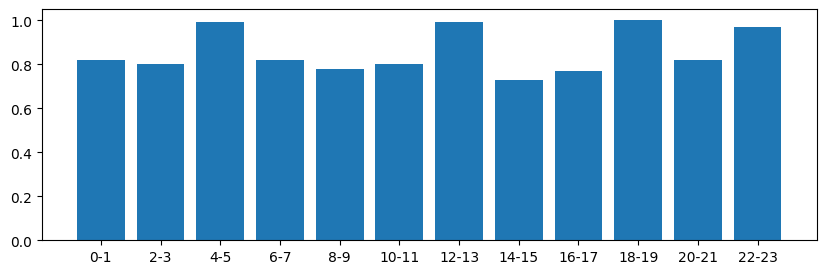

In [42]:
import matplotlib.pyplot as plt

X = df_demand_group['Hour Label']
Y = df_demand_group['EV Charging Demand (kW) - Normalized']

plt.figure(figsize=(10, 3))
plt.bar(X,Y)
plt.show()

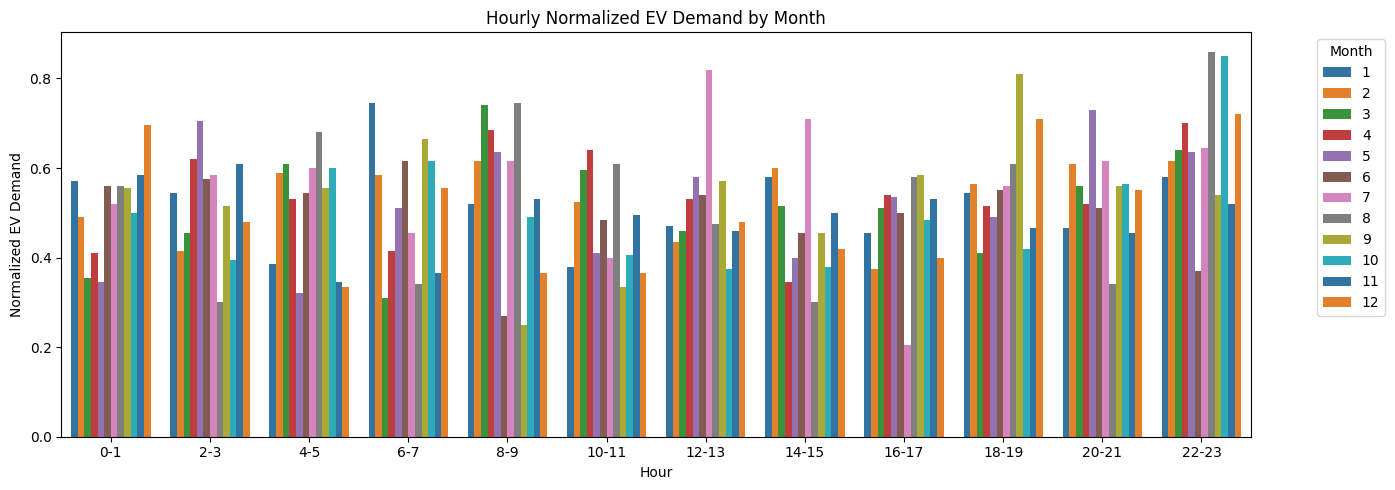

In [43]:
'''
This code generates a bar plot to visualize hourly normalized EV charging demand by month:
- Imports necessary libraries: seaborn, matplotlib, pandas, numpy.
- Creates a figure with specified size using matplotlib.
- Uses seaborn's `barplot` to plot:
    - X-axis: 'Hour Label' (time of day)
    - Y-axis: 'EV Charging Demand (kW) - Normalized'
    - Hue: 'Month', to differentiate months with distinct colors
    - Bars are shown side-by-side for each hour and month (dodge=True)
    - Confidence intervals are disabled (ci=None)
    - Uses the 'tab10' color palette for better distinction.
- Adds axis labels, title, and legend positioned outside the plot.
- Adjusts layout to fit all elements neatly and displays the plot.
'''

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Plot using seaborn
plt.figure(figsize=(14, 5))
sns.barplot(
    data=df_demand_group,
    x='Hour Label',
    y='EV Charging Demand (kW) - Normalized',
    hue='Month',
    dodge=True,  # Side-by-side bars
    palette='tab10',
    ci=None  # Disable confidence intervals
)

# Formatting
plt.xlabel('Hour')
plt.ylabel('Normalized EV Demand')
plt.title('Hourly Normalized EV Demand by Month')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

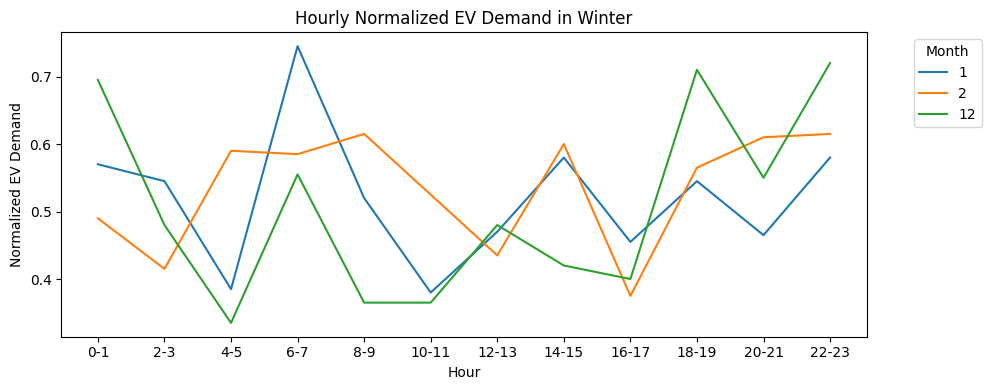

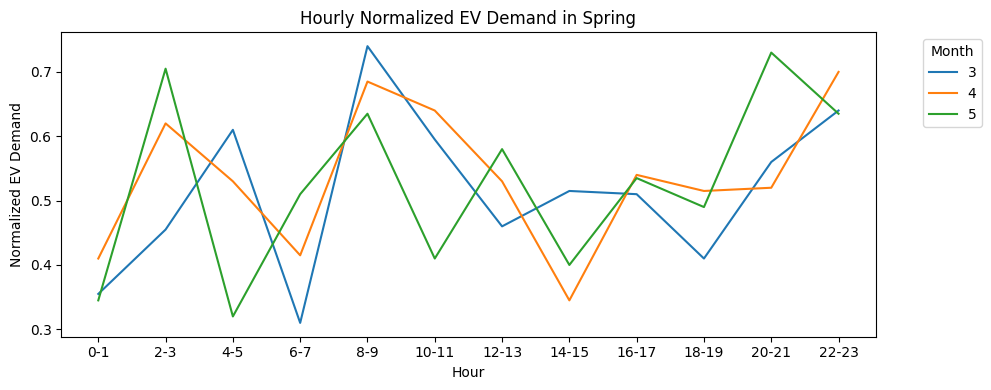

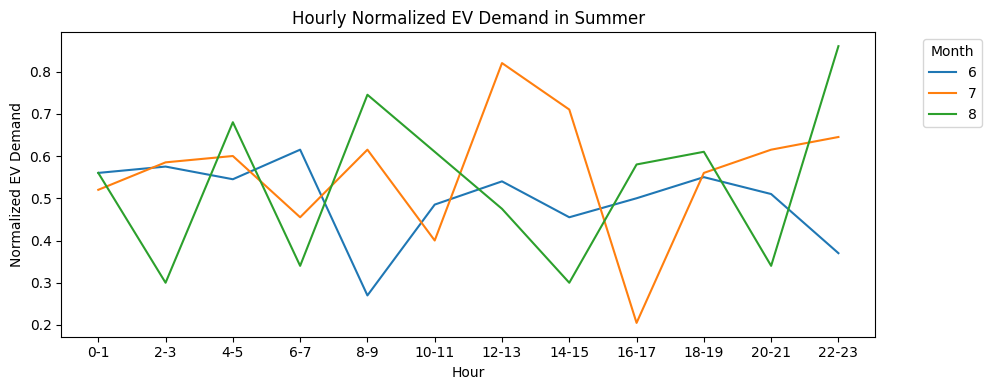

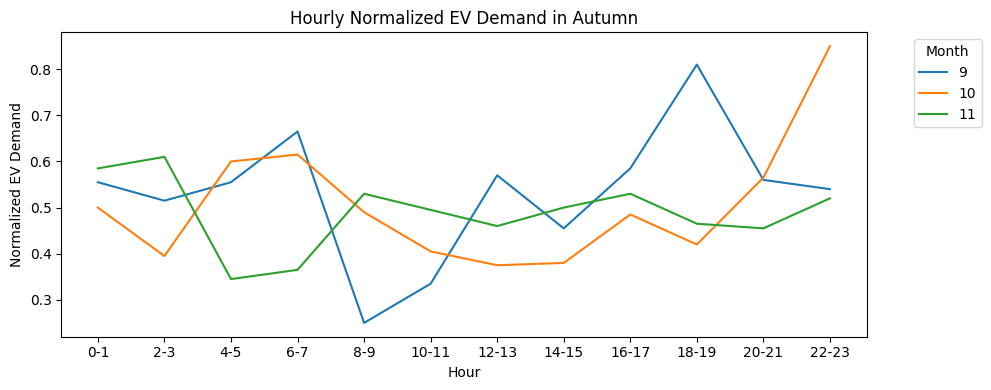

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

season = ['Winter', 'Spring', 'Summer', 'Autumn']

for i in season:
    df_condition = df_demand_group[df_demand_group['Season'] == i]

    # Plot using seaborn
    plt.figure(figsize=(10, 4))
    sns.lineplot(
        data=df_condition,
        x='Hour Label',
        y='EV Charging Demand (kW) - Normalized',
        hue='Month',
        palette='tab10',
        ci=None  # Disable confidence intervals
    )

    # Formatting
    plt.xlabel('Hour')
    plt.ylabel('Normalized EV Demand')
    plt.title(f'Hourly Normalized EV Demand in {i}')
    plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Hourly Normalized EV Charging Demand by Season

This visualization displays the hourly normalized EV charging demand patterns across different seasons, with each season shown in a separate subplot.

### Visualization Details:
- **Plot Type**: 2x2 grid of line plots (one for each season)
- **Figure Size**: 14x6 inches
- **Shared Axes**: All subplots share the same x and y axis scales
- **Data Representation**:
  - X-axis: Hour of day (0-23)
  - Y-axis: Normalized EV charging demand (kW)
  - Lines colored by month (using 'tab10' palette)
- **Confidence Intervals**: Disabled for cleaner visualization

### Customizations:
- Individual titles for each subplot indicating the season
- Consistent axis labels:
  - X-label: "Hour"
  - Y-label: "Normalized EV Demand"
- Legend from the first subplot used for all plots
- `tight_layout()` applied to prevent label overlapping

### Purpose:
This visualization helps compare how EV charging demand patterns vary:
1. Across different hours of the day
2. Between different months
3. Among the four seasons (Winter, Spring, Summer, Autumn)

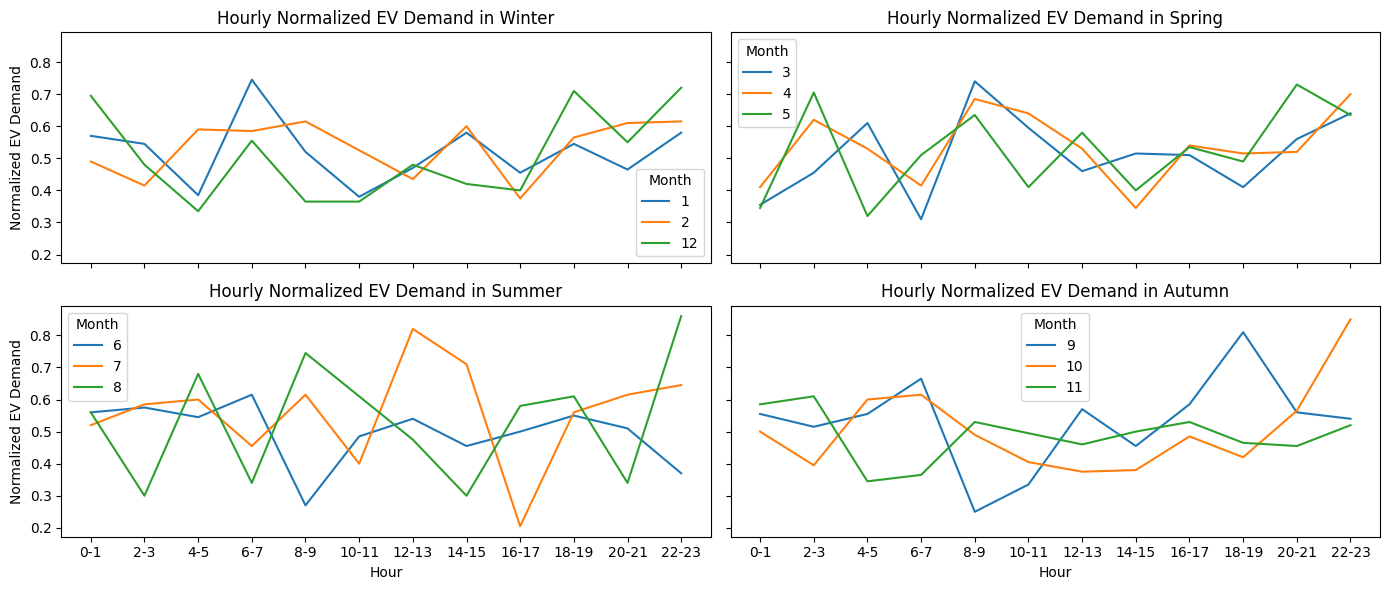

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 6), sharex=True, sharey=True)
season = ['Winter', 'Spring', 'Summer', 'Autumn']

for idx, s in enumerate(season):
    ax = axes[idx // 2, idx % 2]
    df_condition = df_demand_group[df_demand_group['Season'] == s]
    sns.lineplot(
        data=df_condition,
        x='Hour Label',
        y='EV Charging Demand (kW) - Normalized',
        hue='Month',
        palette='tab10',
        ax=ax,
        ci=None  # Disable confidence intervals
    )
    ax.set_title(f'Hourly Normalized EV Demand in {s}')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Normalized EV Demand')

# Add a single legend outside the plot
handles, labels = axes[0, 0].get_legend_handles_labels()
plt.tight_layout()
plt.show()

In [46]:
df_demand_group.head()

,Hour,Month,Season,EV Charging Demand (kW),EV Charging Demand (kW) - Standardized,EV Charging Demand (kW) - Normalized,Hour Label
0,0,1,Winter,0.142705,-0.85,0.37,0-1
1,0,2,Winter,0.152314,0.29,0.57,0-1
2,0,3,Spring,0.150169,0.03,0.53,0-1
3,0,4,Spring,0.140316,-1.13,0.32,0-1
4,0,5,Spring,0.146437,-0.41,0.45,0-1


## Hourly Normalized EV Charging Demand (Aggregated)

This visualization displays the overall trend of normalized EV charging demand across different hours of the day, aggregating all available data.

### Visualization Details:
- **Plot Type**: Single line plot  
- **Figure Size**: 10×5 inches  
- **Data Representation**:
  - **X-axis**: Hour of day (`Hour Label`, likely 0–23)  
  - **Y-axis**: Normalized EV charging demand (`EV Charging Demand (kW) - Normalized`)  
- **Confidence Intervals**: Disabled (`ci=None`) for a clean trend line  

### Customizations:
- **Axis Labels**:
  - X-label: `Hour`  
  - Y-label: `Normalized EV Demand`  
- **Title**: `Hourly Normalized EV Demand` (describes the plot's focus)  
- **Layout**: `tight_layout()` ensures no overlapping elements  

### Purpose:
This plot provides a high-level overview of how EV charging demand fluctuates throughout the day, ignoring seasonal or monthly variations. Useful for identifying peak demand hours and general usage patterns.

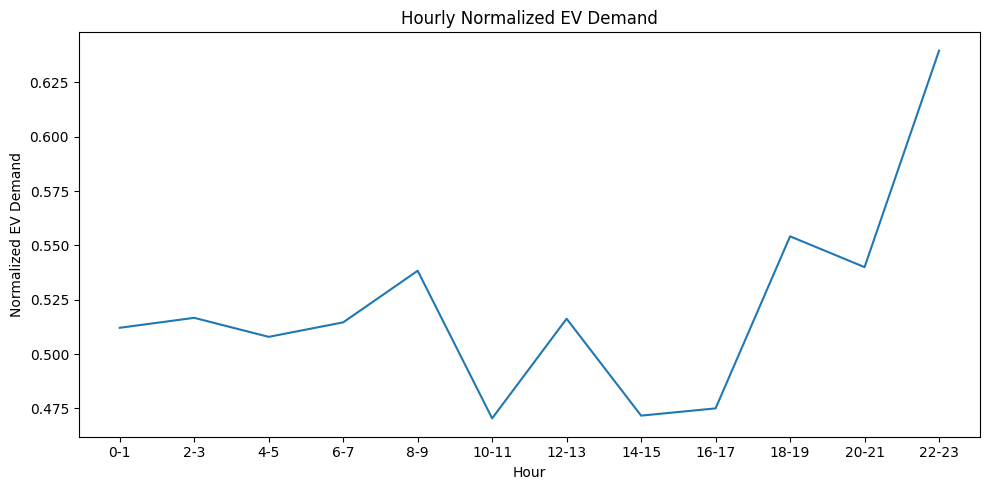

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(
        data=df_demand_group,
        x='Hour Label',
        y='EV Charging Demand (kW) - Normalized',
        ci=None
    )
plt.xlabel('Hour')
plt.ylabel('Normalized EV Demand')
plt.title('Hourly Normalized EV Demand')
plt.tight_layout()
plt.show()

In [48]:
df.columns

Index(['Date', 'Time', 'EV Charging Demand (kW)',
       'Solar Energy Production (kW)', 'Wind Energy Production (kW)',
       'Electricity Price ($/kWh)', 'Grid Availability', 'Weather Conditions',
       'Battery Storage (kWh)', 'Charging Station Capacity (kW)',
       'EV Charging Efficiency (%)', 'Number of EVs Charging',
       'Peak Demand (kW)', 'Renewable Energy Usage (%)',
       'Grid Stability Index', 'Carbon Emissions (kgCO2/kWh)',
       'Power Outages (hours)', 'Energy Savings ($)',
       'Total Renewable Energy Production (kW)',
       'Effective Charging Capacity (kW)', 'Adjusted Charging Demand (kW)',
       'Net Energy Cost ($)', 'Carbon Footprint Reduction (kgCO2)',
       'Renewable Energy Efficiency',
       'EV Charging Efficiency (%) - Normalized', 'Hour', 'Day Period',
       'EV Charging Demand (kW) - Normalized',
       'Total Renewable Energy Production (kW) - Normalized', 'Season',
       'Month'],
      dtype='object')

# EV Charging Demand Prediction with SHAP Analysis

## Data Preparation and Feature Engineering

This section defines the feature sets and target variable for our EV charging demand prediction model. We establish three categories of variables:

- **Numerical features**: 21 continuous variables including energy production metrics, pricing, battery specifications, charging infrastructure details, and environmental factors
- **Categorical features**: 3 categorical variables (Season, Day Period, Weather Conditions) that will be one-hot encoded
- **Target variable**: EV Charging Demand (kW) - our prediction objective

The feature selection encompasses both direct charging-related variables and contextual factors that influence charging patterns.

## Data Preprocessing Pipeline

The preprocessing pipeline prepares the dataset for machine learning by:

1. **Categorical Encoding**: Converting categorical variables to numerical format using one-hot encoding with `drop_first=True` to avoid multicollinearity
2. **Missing Value Handling**: Removing rows with missing values to ensure data quality
3. **Feature Matrix Construction**: Building the feature matrix X by combining numerical features with encoded categorical variables
4. **Target Variable Extraction**: Isolating the EV Charging Demand as our target variable y

This approach ensures all features are in a suitable format for linear regression modeling.

## Feature Standardization and Data Splitting

To optimize model performance and SHAP interpretability:

1. **Standardization**: Apply StandardScaler to normalize all features, ensuring they have zero mean and unit variance
2. **Train-Test Split**: Divide the dataset into 80% training and 20% testing sets with a fixed random state for reproducibility

Standardization is particularly important for linear models as it prevents features with larger scales from dominating the model coefficients.

## Model Training and SHAP Explainer Setup

We train a Linear Regression model on the standardized training data and prepare it for interpretability analysis:

1. **Model Training**: Fit a LinearRegression model to learn the relationship between features and EV charging demand
2. **SHAP Explainer**: Initialize a SHAP explainer specifically designed for linear models using the training data as background
3. **SHAP Values Calculation**: Compute SHAP values for the test set to understand feature contributions to individual predictions

SHAP (SHapley Additive exPlanations) provides unified framework for interpreting machine learning models.

## SHAP Visualization Analysis

Generate comprehensive visualizations to understand model behavior:

1. **Bar Plot**: `shap.plots.bar()` shows the average absolute impact of each feature across all test samples
2. **Beeswarm Plot**: `shap.plots.beeswarm()` displays the distribution of SHAP values for each feature, revealing both magnitude and direction of influence
3. **Waterfall Plot**: `shap.plots.waterfall()` demonstrates how individual features contribute to a single prediction, starting from the expected value

These visualizations provide different perspectives on feature importance and model decision-making processes.

## SHAP Values Data Frame Creation

Convert SHAP values into a pandas DataFrame for further analysis:

- **Structure**: Each row represents a test sample, each column represents a feature
- **Values**: SHAP values indicating how much each feature contributes to the prediction for that specific sample
- **Purpose**: Enables quantitative analysis of feature contributions and supports downstream analytical tasks

The DataFrame format facilitates statistical analysis and custom visualizations of the SHAP values.

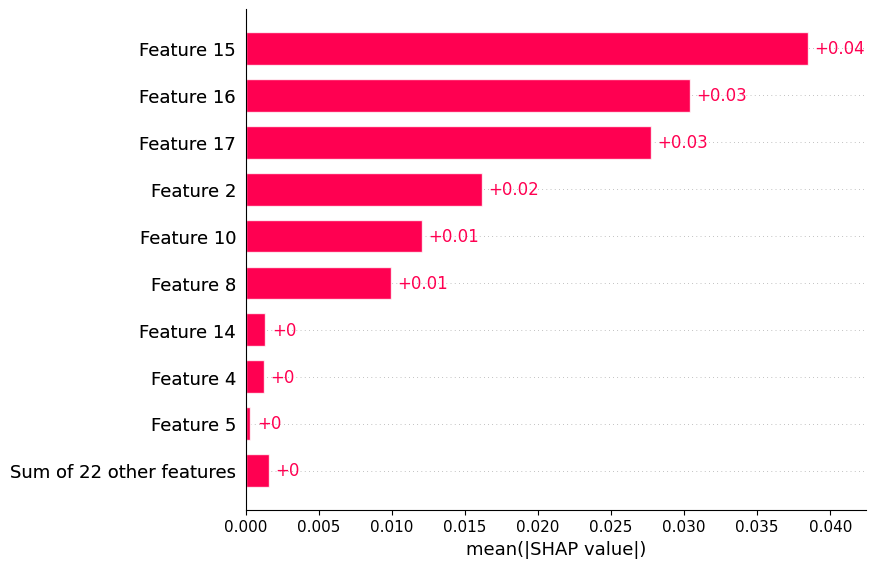

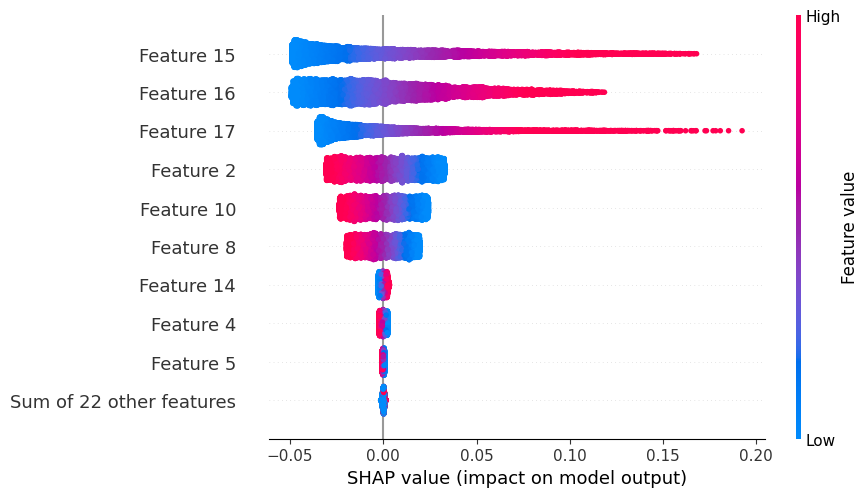

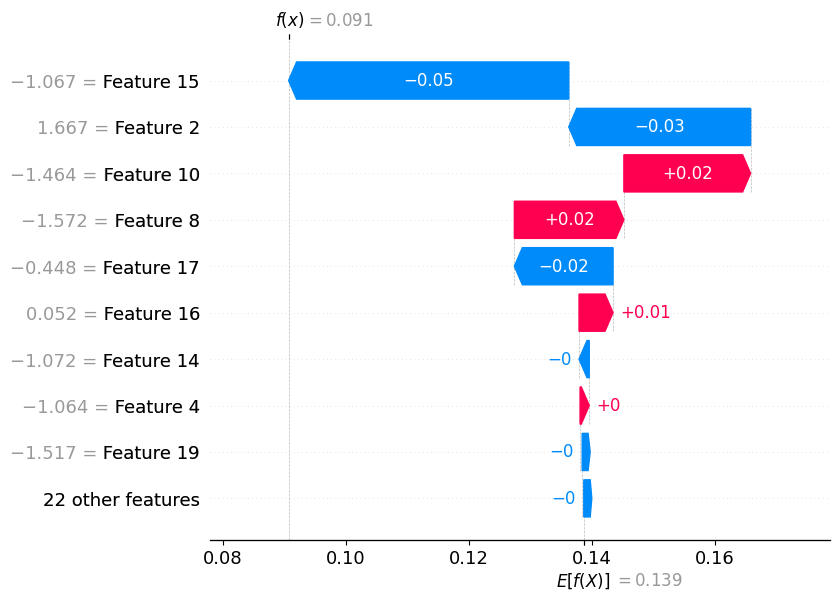

,Solar Energy Production (kW),Wind Energy Production (kW),Electricity Price ($/kWh),Battery Storage (kWh),Charging Station Capacity (kW),EV Charging Efficiency (%),Number of EVs Charging,Peak Demand (kW),Renewable Energy Usage (%),Grid Stability Index,...,Season_Spring,Season_Summer,Season_Winter,Day Period_Evening,Day Period_Morning,Day Period_Night,Weather Conditions_Cloudy,Weather Conditions_Partly Cloudy,Weather Conditions_Rainy,Weather Conditions_Sunny
0,-0.000075,-0.000034,-0.029581,-0.000123,0.001493,0.000112,0.000023,-1.181501e-06,0.017817,-0.000004,...,-0.00018,-0.000071,-0.000184,-0.000004,1.936035e-07,0.000131,-0.000017,0.000016,-0.000007,0.000072
1,0.000075,-0.000058,0.001265,0.000111,-0.002139,0.000035,-0.000068,1.011565e-06,0.012076,0.000022,...,0.00042,-0.000071,-0.000184,0.000025,1.936035e-07,-0.000046,-0.000017,0.000016,-0.000007,-0.000305
2,-0.000032,-0.000061,0.024145,-0.000081,-0.001049,-0.000596,-0.000022,-1.410294e-07,-0.003270,0.000034,...,0.00042,-0.000071,-0.000184,0.000025,1.936035e-07,-0.000046,-0.000017,0.000016,0.000038,0.000072
3,-0.000026,-0.000007,-0.021962,0.000208,0.002208,0.000267,0.000023,4.172432e-07,-0.010296,-0.000024,...,0.00042,-0.000071,-0.000184,-0.000004,-2.786002e-07,-0.000046,-0.000017,0.000016,-0.000007,-0.000305
4,0.000023,0.000007,-0.026896,-0.000199,-0.001304,0.000158,-0.000090,-2.842437e-07,-0.011039,-0.000035,...,0.00042,-0.000071,-0.000184,0.000025,1.936035e-07,-0.000046,-0.000017,0.000016,-0.000007,-0.000305


In [49]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = [
    'Solar Energy Production (kW)', 
    'Wind Energy Production (kW)', 
    'Electricity Price ($/kWh)',
    'Battery Storage (kWh)',
    'Charging Station Capacity (kW)',
    'EV Charging Efficiency (%)',
    'Number of EVs Charging',
    'Peak Demand (kW)',
    'Renewable Energy Usage (%)',
    'Grid Stability Index', 
    'Carbon Emissions (kgCO2/kWh)',
    'Power Outages (hours)', 
    'Energy Savings ($)',
    'Total Renewable Energy Production (kW)',
    'Effective Charging Capacity (kW)', 
    'Adjusted Charging Demand (kW)',
    'Net Energy Cost ($)', 
    'Carbon Footprint Reduction (kgCO2)',
    'Renewable Energy Efficiency',
    'Hour', 
    'Month'
]

categorical = ['Season', 'Day Period', 'Weather Conditions']
target = 'EV Charging Demand (kW)'

# --- Step 2: Preprocessing ---
df_model = df.copy()

# One-hot encode categoricals
df_model = pd.get_dummies(df_model, columns=categorical, drop_first=True)

# Fill missing values if any
df_model = df_model.dropna()

X = df_model[features + [col for col in df_model.columns if col.startswith(('Season_', 'Day Period_', 'Weather Conditions_'))]]
y = df_model[target]

# Standardize features (optional but helps SHAP with linear models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)  # uses LinearExplainer
shap_values = explainer(X_test)

shap.plots.bar(shap_values)

shap.plots.beeswarm(shap_values)

shap.plots.waterfall(shap_values[0])

shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_df.head()


# SHAP Force Plot Visualization

## Interactive SHAP Force Plot Setup

This section creates an interactive force plot visualization to explain individual predictions:

1. **JavaScript Initialization**: `shap.initjs()` loads the necessary JavaScript libraries for rendering interactive SHAP visualizations in Jupyter notebooks
2. **Force Plot Generation**: Creates a detailed force plot that shows how each feature pushes the prediction above or below the expected baseline value

## Understanding the Force Plot

The force plot provides an intuitive visualization of a single prediction by displaying:

- **Baseline (Expected Value)**: The average prediction across all training samples
- **Feature Contributions**: How each feature value pushes the prediction higher (red) or lower (blue) than the baseline
- **Final Prediction**: The sum of the baseline plus all feature contributions
- **Feature Values**: The actual values of features for this specific sample

This visualization helps answer the question: "Why did the model predict this specific value for this particular sample?"

In [50]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test[0], feature_names=X.columns)

# SHAP Force Plot Analysis - EV Demand Prediction

## Model Prediction: 0.09 (Low EV Demand)

#### Reading Guide:
- **Center Number (0.09)**: Final prediction score (0.09 out of 1.0 = low EV demand)
- **Red arrows (←)**: Factors REDUCING EV demand  
- **Blue arrows (→)**: Factors INCREASING EV demand
- **Arrow length & numbers**: Stronger influence = longer arrows & bigger numbers

---

## Feature Impact Analysis

### 🔴 **Negative Contributors (Reducing EV Demand)**

| Factor | Impact | Simple Explanation |
|--------|--------|-------------------|
| **Renewable Energy Usage** | -1.572 | Areas with lots of solar/wind power have LESS EV demand (possibly rural areas with poor charging infrastructure) |
| **Carbon Emissions** | -1.484 | High pollution areas have LOW EV demand (less environmental consciousness) |
| **Adjusted Charging Demand** | -1.067 | Places needing lots of charging stations have LESS EV adoption (infrastructure barrier) |

### 🔵 **Positive Contributors (Increasing EV Demand)**

| Factor | Impact | Simple Explanation |
|--------|--------|-------------------|
| **Electricity Price** | +1.687 | Higher electricity costs = MORE EV demand (wealthy, developed areas with better infrastructure) |
| **Carbon Footprint Reduction** | +0.4483 | Environmental awareness drives EV adoption |

---

## Key Insights

1. **Infrastructure Dominates**: Charging infrastructure challenges are the biggest barrier (-1.067)
2. **Wealth Effect**: Higher electricity prices indicate developed areas with better EV adoption (+1.687)
3. **Rural Renewable Paradox**: Areas with renewable energy surprisingly show lower EV demand (-1.572)
4. **Environmental Awareness**: Carbon footprint reduction positively influences adoption (+0.4483)

## Strategic Implications

- **Infrastructure matters more than environmental benefits** (larger negative impacts)
- **Wealthy urban areas adopt EVs faster** than rural renewable energy areas
- **Charging infrastructure development is critical** for EV adoption
- **Environmental messaging alone is insufficient** without infrastructure support

## Bottom Line
This prediction shows **low EV adoption likelihood (0.09)** primarily due to **infrastructure challenges**, despite some positive environmental awareness. The model suggests that practical factors (charging availability, economic development) outweigh environmental motivations in EV adoption decisions.

In [51]:
base_value = explainer.expected_value
shap_sum = shap_values[0].values.sum()
actual_pred = base_value + shap_sum

print(f"Base Value: {base_value}")
print(f"SHAP Sum: {shap_sum}")
print(f"Actual Prediction: {actual_pred}")

Base Value: 0.13871081272012317
SHAP Sum: -0.04802000718084904
Actual Prediction: 0.09069080553927414


# SHAP Summary Plot Analysis

## Interpreting the Summary Plot

This visualization reveals key insights about model behavior:

1. **Feature Importance**: Features at the top have the greatest overall impact on predictions
2. **Impact Patterns**: The spread of dots shows whether a feature has consistent or variable effects
3. **Value-Impact Relationships**: Color patterns reveal how feature values correlate with their impact:
   - Red dots on the right: High feature values increase predictions
   - Blue dots on the left: Low feature values decrease predictions
   - Mixed patterns: Complex non-linear relationships


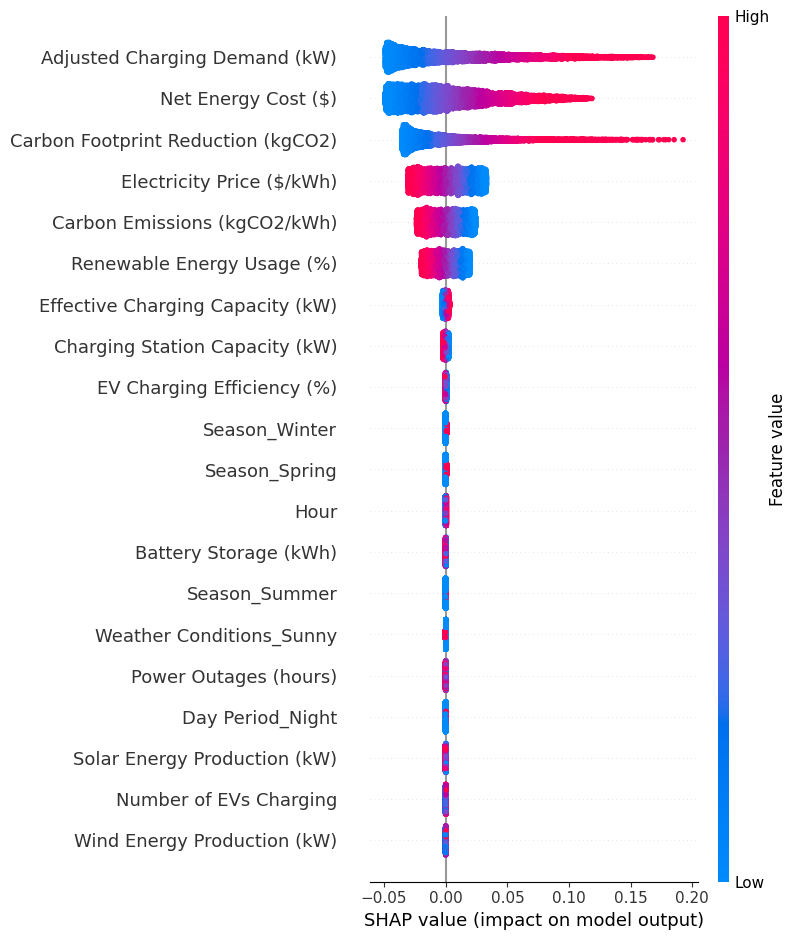

In [52]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [53]:
X.columns

Index(['Solar Energy Production (kW)', 'Wind Energy Production (kW)',
       'Electricity Price ($/kWh)', 'Battery Storage (kWh)',
       'Charging Station Capacity (kW)', 'EV Charging Efficiency (%)',
       'Number of EVs Charging', 'Peak Demand (kW)',
       'Renewable Energy Usage (%)', 'Grid Stability Index',
       'Carbon Emissions (kgCO2/kWh)', 'Power Outages (hours)',
       'Energy Savings ($)', 'Total Renewable Energy Production (kW)',
       'Effective Charging Capacity (kW)', 'Adjusted Charging Demand (kW)',
       'Net Energy Cost ($)', 'Carbon Footprint Reduction (kgCO2)',
       'Renewable Energy Efficiency', 'Hour', 'Month', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Day Period_Evening',
       'Day Period_Morning', 'Day Period_Night', 'Weather Conditions_Cloudy',
       'Weather Conditions_Partly Cloudy', 'Weather Conditions_Rainy',
       'Weather Conditions_Sunny'],
      dtype='object')

# Neural Network Model for EV Charging Demand Prediction

## Library Imports and Dependencies

This section imports the essential libraries for building and evaluating a neural network model:

- **Data Handling**: `pandas` and `numpy` for data manipulation and numerical operations
- **Model Building**: `MLPRegressor` from scikit-learn for multi-layer perceptron regression
- **Evaluation Metrics**: MAE, MSE, and R² score for comprehensive model assessment
- **Visualization**: `matplotlib.pyplot` for plotting training curves and prediction comparisons
- **Preprocessing**: `StandardScaler` for feature normalization

## Feature Selection and Target Definition

The model uses a focused set of economic and environmental features:

- **Selected Features**: 5 key variables including energy costs, carbon metrics, electricity pricing, and renewable energy usage
- **Categorical Variables**: Season, Day Period, and Weather Conditions (currently commented out)
- **Target Variable**: EV Charging Demand (kW) as the prediction objective

This streamlined feature set focuses on the most impactful economic and environmental factors affecting charging demand.

## Data Preprocessing Pipeline

The preprocessing steps prepare the data for neural network training:

1. **Data Copying**: Create a working copy of the original dataset to preserve data integrity
2. **Feature Matrix Creation**: Extract only the selected numerical features (categorical encoding currently disabled)
3. **Target Extraction**: Isolate the EV Charging Demand as the dependent variable
4. **Feature Standardization**: Apply StandardScaler to normalize all features to zero mean and unit variance

Standardization is crucial for neural networks as it ensures all features contribute equally to the learning process.

## Train-Test Split Configuration

The data is split using scikit-learn's best practices:

- **Training Set**: 80% of the data for model learning
- **Test Set**: 20% of the data for unbiased evaluation
- **Random State**: Fixed seed (42) ensures reproducible results across runs

This split ratio provides sufficient training data while maintaining adequate test samples for reliable evaluation.

## Neural Network Architecture and Training

The model implements a Multi-Layer Perceptron (MLP) with specific architectural choices:

- **Hidden Layers**: Two hidden layers with 64 and 32 neurons respectively
- **Architecture Pattern**: Decreasing layer sizes (64 → 32) for feature compression
- **Training Parameters**: Maximum 1000 iterations with verbose output for monitoring
- **Random State**: Fixed seed for reproducible model initialization

The two-layer architecture balances model complexity with training efficiency, suitable for the selected feature set.

## Model Evaluation and Metrics

Comprehensive evaluation using multiple regression metrics:

- **R² Score**: Coefficient of determination measuring explained variance
- **MAE**: Mean Absolute Error for average prediction deviation
- **MSE**: Mean Squared Error penalizing larger errors more heavily
- **RMSE**: Root Mean Squared Error in original units for interpretability

These metrics provide different perspectives on model performance and prediction accuracy.

## Training Progress Visualization

The loss curve visualization monitors training effectiveness:

- **Loss Curve Plot**: Shows how the model's training loss decreases over epochs
- **Convergence Assessment**: Helps identify if the model has converged or needs more iterations
- **Training Diagnostics**: Reveals potential overfitting or underfitting issues

This visualization is essential for understanding the training dynamics and optimization process.

## Model Performance Summary

The comprehensive performance report includes:

- **Accuracy Metrics**: All four evaluation metrics with 4-decimal precision
- **Model Configuration**: Number of features, hidden layers, and training epochs
- **Feature List**: Complete list of input variables used in the model
- **Architecture Summary**: Details of the neural network structure

This summary provides stakeholders with complete transparency about model performance and configuration.

## Prediction Comparison Visualization

The actual vs predicted plot demonstrates model performance:

- **Sample Visualization**: Shows first 100 test samples for detailed comparison
- **Dual Line Plot**: Actual values (circles) vs predicted values (x-marks)
- **Performance Assessment**: Visual evaluation of prediction accuracy and patterns
- **Error Analysis**: Identifies systematic biases or prediction challenges

This visualization helps stakeholders understand how well the model captures real-world charging demand patterns.

Iteration 1, loss = 0.00083910
Iteration 2, loss = 0.00010142
Iteration 3, loss = 0.00006625
Iteration 4, loss = 0.00004879
Iteration 5, loss = 0.00003926
Iteration 6, loss = 0.00003410
Iteration 7, loss = 0.00002972
Iteration 8, loss = 0.00002696
Iteration 9, loss = 0.00002450
Iteration 10, loss = 0.00002265
Iteration 11, loss = 0.00002106
Iteration 12, loss = 0.00001968
Iteration 13, loss = 0.00001851
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


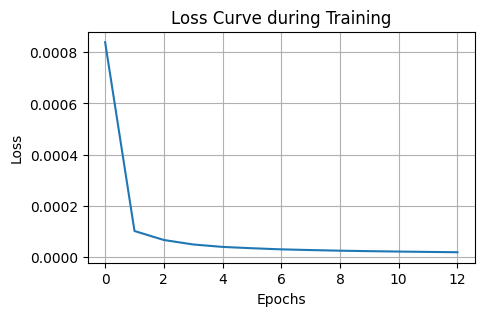

R² Score: 0.9978
MAE: 0.0032
MSE: 0.0000
RMSE: 0.0040
Number of Features: 5
features: ['Net Energy Cost ($)', 'Carbon Footprint Reduction (kgCO2)', 'Electricity Price ($/kWh)', 'Carbon Emissions (kgCO2/kWh)', 'Renewable Energy Usage (%)']
Target: EV Charging Demand (kW)
Number of Hidden Layers: 2
Number of Epochs: 13


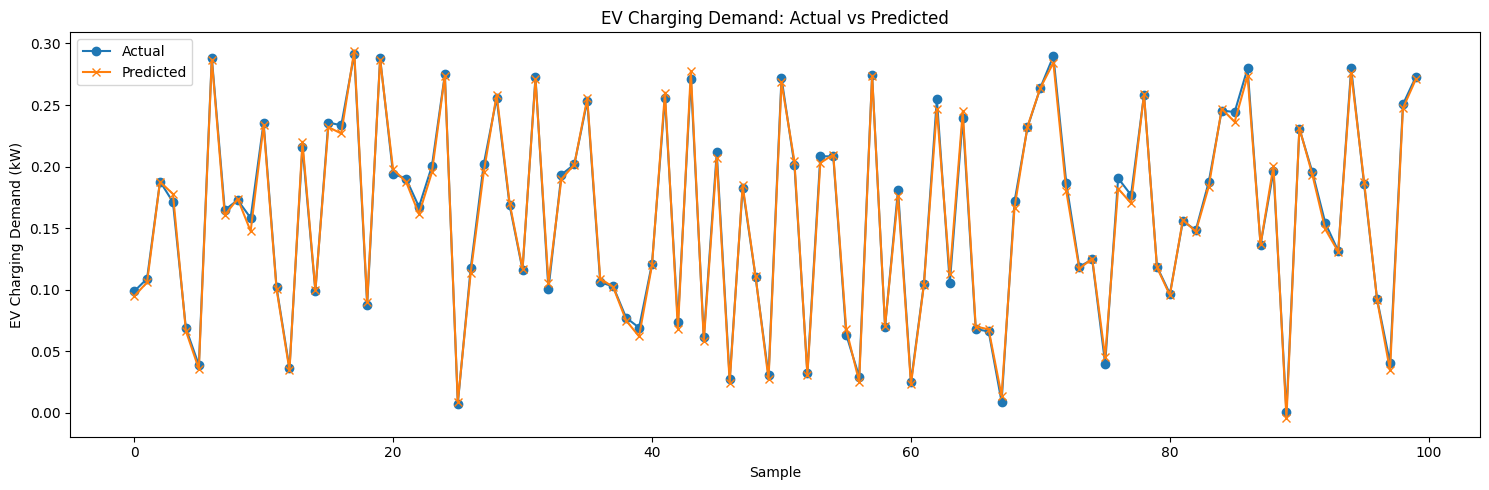

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Step 1: Select Features & Target ---
features = [
'Net Energy Cost ($)',
'Carbon Footprint Reduction (kgCO2)',
'Electricity Price ($/kWh)',
'Carbon Emissions (kgCO2/kWh)',
'Renewable Energy Usage (%)'
]

categorical = ['Season', 'Day Period', 'Weather Conditions']
target = 'EV Charging Demand (kW)'

# --- Step 2: Preprocessing ---
df_model = df.copy()

#One-hot encode categoricals
#df_model = pd.get_dummies(df_model, columns=categorical, drop_first=True)

# Fill missing values if any
#df_model = df_model.dropna()

#X = df_model[features + [col for col in df_model.columns if col.startswith(('Season_', 'Day Period_', 'Weather Conditions_'))]]
X = df_model[features]
y = df_model[target]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Step 4: Build & Train Neural Network ---
model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42,verbose=True)
model.fit(X_train, y_train)

# --- Step 5: Predictions & Evaluation ---
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

if hasattr(model, 'loss_curve_'):
    plt.figure(figsize=(5, 3))
    plt.plot(model.loss_curve_)
    plt.title('Loss Curve during Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()


print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Number of Features: {X.shape[1]}")
print(f"features: {features}")
print(f"Target: {target}")
print(f"Number of Hidden Layers: {len(model.hidden_layer_sizes)}")
print(f"Number of Epochs: {model.n_iter_}")


# --- Step 6: Plot Actual vs Predicted ---
plt.figure(figsize=(15, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title("EV Charging Demand: Actual vs Predicted")
plt.xlabel("Sample")
plt.ylabel("EV Charging Demand (kW)")
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
print("Length of y_train",len(y_train))
print("Length of y_test",len(y_test))
print("Length of y_pred",len(y_pred))

Length of y_train 47848
Length of y_test 11962
Length of y_pred 11962


In [56]:
df.head()

,Date,Time,EV Charging Demand (kW),Solar Energy Production (kW),Wind Energy Production (kW),Electricity Price ($/kWh),Grid Availability,Weather Conditions,Battery Storage (kWh),Charging Station Capacity (kW),...,Net Energy Cost ($),Carbon Footprint Reduction (kgCO2),Renewable Energy Efficiency,EV Charging Efficiency (%) - Normalized,Hour,Day Period,EV Charging Demand (kW) - Normalized,Total Renewable Energy Production (kW) - Normalized,Season,Month
0,2021-01-01,00:00:00,0.112362,0.125388,0.009105,0.137310,Available,Partly Cloudy,16.532408,21.763422,...,0.015428,0.023158,0.006350,0.87,0,Night,0.37,0.22,Winter,1
1,2021-01-01,01:00:00,0.285214,0.052697,0.107589,0.125105,Available,Sunny,39.106930,31.215028,...,0.035682,0.060875,0.005799,0.43,1,Night,0.95,0.27,Winter,1
2,2021-01-01,02:00:00,0.219598,0.105035,0.043996,0.106661,Available,Cloudy,6.112691,46.489116,...,0.023423,0.006425,0.003567,0.49,2,Night,0.73,0.25,Winter,1
3,2021-01-01,03:00:00,0.179598,0.073839,0.275727,0.072209,Available,Partly Cloudy,30.041088,49.675029,...,0.012969,0.083420,0.007586,0.64,3,Night,0.60,0.58,Winter,1
4,2021-01-01,04:00:00,0.046806,0.068614,0.059824,0.091090,Available,Partly Cloudy,45.085422,21.166182,...,0.004264,0.000476,0.007242,0.19,4,Morning,0.16,0.21,Winter,1


In [57]:
'''
Checked unique values in both the dataframe
'''

for i in df.columns:
    print(f"Unique values in column '{i}':")
    print(df[i].unique(),"\n")

Unique values in column 'Date':
<DatetimeArray>
['2021-01-01 00:00:00', '2021-01-02 00:00:00', '2021-01-03 00:00:00',
 '2021-01-04 00:00:00', '2021-01-05 00:00:00', '2021-01-06 00:00:00',
 '2021-01-07 00:00:00', '2021-01-08 00:00:00', '2021-01-09 00:00:00',
 '2021-01-10 00:00:00',
 ...
 '2024-05-22 00:00:00', '2024-05-23 00:00:00', '2024-05-24 00:00:00',
 '2024-05-25 00:00:00', '2024-05-26 00:00:00', '2024-05-27 00:00:00',
 '2024-05-28 00:00:00', '2024-05-29 00:00:00', '2024-05-30 00:00:00',
 '2024-05-31 00:00:00']
Length: 1247, dtype: datetime64[ns] 

Unique values in column 'Time':
['00:00:00' '01:00:00' '02:00:00' '03:00:00' '04:00:00' '05:00:00'
 '06:00:00' '07:00:00' '08:00:00' '09:00:00' '10:00:00' '11:00:00'
 '12:00:00' '13:00:00' '14:00:00' '15:00:00' '16:00:00' '17:00:00'
 '18:00:00' '19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00'] 

Unique values in column 'EV Charging Demand (kW)':
[0.11236204 0.28521429 0.21959818 ... 0.23297838 0.07779743 0.2481701 ] 

Unique values

In [58]:
df_dt = df[['Month','Hour','Day Period']]
df_dt.head()

,Month,Hour,Day Period
0,1,0,Night
1,1,1,Night
2,1,2,Night
3,1,3,Night
4,1,4,Morning


# Decision Tree Classification for Day Period Prediction

## Library Imports and Dependencies

This section imports the necessary libraries for building and evaluating a decision tree classification model:

- **Data Manipulation**: `pandas` and `numpy` for data handling and numerical operations
- **Model Building**: `DecisionTreeClassifier` from scikit-learn for tree-based classification
- **Tree Visualization**: `plot_tree` for visualizing the decision tree structure
- **Evaluation Metrics**: `accuracy_score` and `confusion_matrix` for classification performance assessment
- **Visualization**: `matplotlib.pyplot` and `ConfusionMatrixDisplay` for creating plots and confusion matrix displays

## Feature Selection and Target Definition

The model uses a simple temporal feature set to predict day periods:

- **Features**: Month and Hour - two temporal variables that capture seasonal and daily patterns
- **Target Variable**: Day Period - categorical variable representing different time periods of the day
- **Data Source**: Uses `df_dt` dataset specifically prepared for this classification task

This minimal feature set tests whether temporal patterns alone can effectively classify day periods.

## Train-Test Split Configuration

The data is partitioned using standard machine learning practices:

- **Training Set**: 80% of the data for model learning and tree construction
- **Test Set**: 20% of the data for unbiased performance evaluation
- **Random State**: Fixed seed (42) ensures reproducible results across different runs

This split ratio provides adequate training data while maintaining sufficient test samples for reliable evaluation.

## Decision Tree Model Configuration

The decision tree is configured with specific parameters to balance interpretability and performance:

- **Maximum Leaf Nodes**: Limited to 10 nodes to prevent overfitting and maintain interpretability
- **Random State**: Fixed seed for reproducible model initialization and splitting decisions
- **Algorithm**: Uses the default CART (Classification and Regression Trees) algorithm

The leaf node limitation ensures the tree remains simple enough for human interpretation while capturing key decision patterns.

## Model Training and Prediction

The model training process involves:

1. **Tree Construction**: The algorithm builds a decision tree by finding optimal splits based on feature values
2. **Learning Process**: The tree learns to classify day periods based on month and hour patterns
3. **Prediction Generation**: Apply the trained model to test data for performance evaluation

The decision tree creates interpretable rules that can be easily understood by domain experts.

## Accuracy Assessment

Model performance is evaluated using classification accuracy:

- **Accuracy Metric**: Percentage of correct predictions out of total predictions
- **Display Format**: Results shown with 2 decimal places for clear interpretation
- **Performance Baseline**: Provides a single metric to assess overall model effectiveness

Accuracy gives a quick overview of how well the model performs on unseen data.

## Confusion Matrix Analysis

The confusion matrix provides detailed classification performance insights:

- **Matrix Structure**: Shows true labels vs predicted labels for each class
- **Visual Representation**: Uses blue color scheme with `ConfusionMatrixDisplay` for clear interpretation
- **Performance Breakdown**: Reveals which day periods are correctly classified and which are confused
- **Error Analysis**: Identifies specific misclassification patterns and potential model weaknesses

This analysis helps understand not just overall accuracy but also class-specific performance.

## Decision Tree Visualization

The tree structure visualization reveals the model's decision-making process:

- **Tree Structure**: Shows the complete decision path from root to leaf nodes
- **Feature Names**: Displays actual feature names (Month, Hour) for interpretability
- **Class Labels**: Shows the predicted day period classes at each leaf node
- **Node Coloring**: Filled nodes indicate the dominant class and prediction confidence
- **Decision Rules**: Each split shows the exact threshold values used for classification

This visualization makes the model completely transparent, allowing stakeholders to understand exactly how predictions are made based on temporal patterns.

Accuracy: 1.00


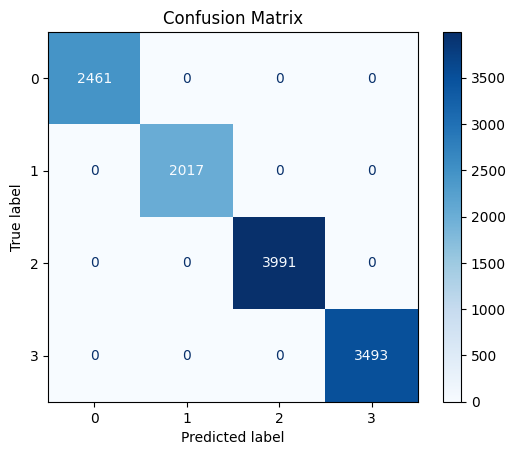

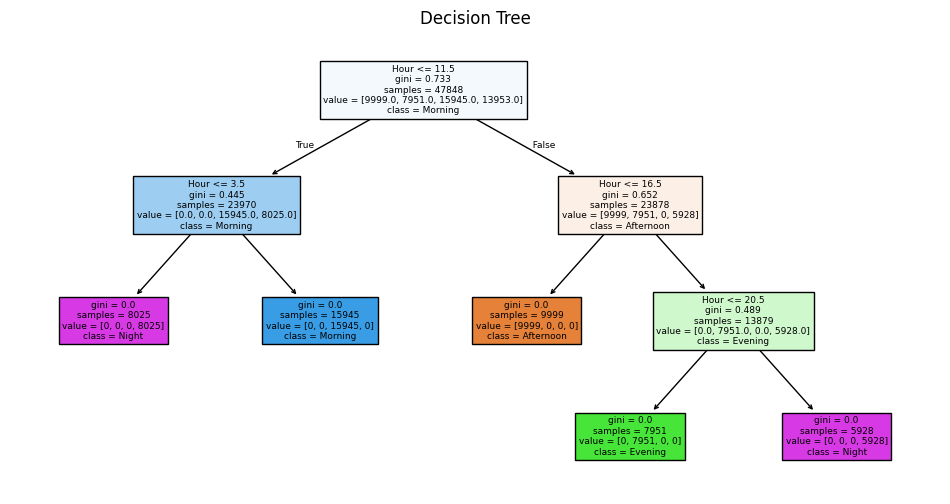

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df_dt[['Month','Hour']]
y = df_dt['Day Period']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = DecisionTreeClassifier(max_leaf_nodes=10,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in model.classes_], filled=True)
plt.title("Decision Tree")
plt.show()



In [60]:
df_dt = df[['Month','Hour','EV Charging Demand (kW)','Electricity Price ($/kWh)','Season']]
df_dt.head()

,Month,Hour,EV Charging Demand (kW),Electricity Price ($/kWh),Season
0,1,0,0.112362,0.137310,Winter
1,1,1,0.285214,0.125105,Winter
2,1,2,0.219598,0.106661,Winter
3,1,3,0.179598,0.072209,Winter
4,1,4,0.046806,0.091090,Winter


In [61]:
len(df_dt)*0.20

11962.0

Accuracy: 1.00


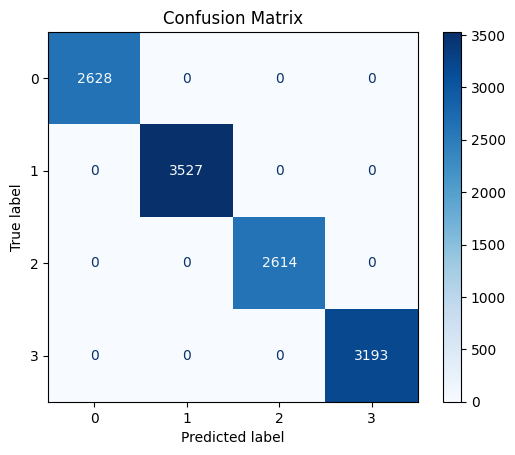

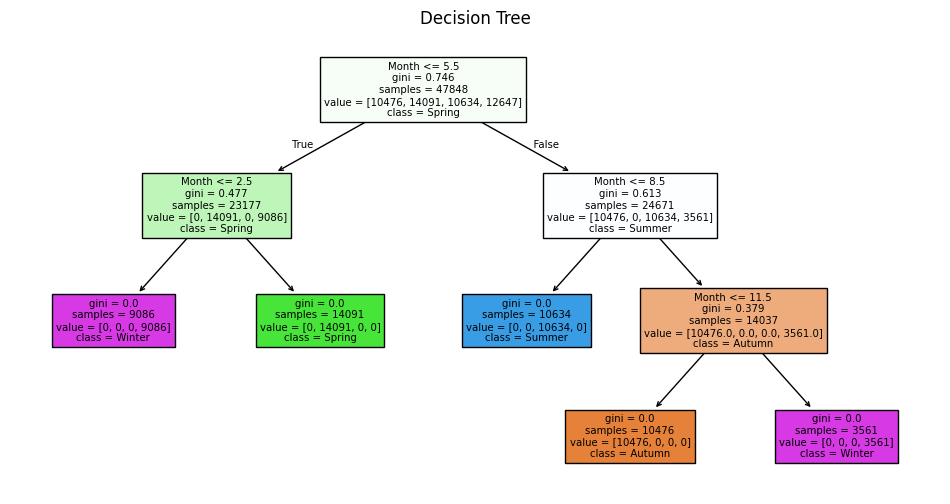

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#X = df_dt[['Month','Hour']]
#y = df_dt['Day Period']

X = df_dt[['Month','Hour','EV Charging Demand (kW)','Electricity Price ($/kWh)']]
y = df_dt['Season']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = DecisionTreeClassifier(max_leaf_nodes=10,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in model.classes_], filled=True)
plt.title("Decision Tree")
plt.show()



### What does this Decision Tree outcome suggest?

- **Main Suggestion:**  
  The Decision Tree is predicting the **Season** using the feature **Month** (and possibly others, but only Month is used in the splits).
- The tree splits the months into four groups, each corresponding to a season: **Winter, Spring, Summer, Autumn**.
- The splits are based on the value of `Month` (e.g., `Month <= 2.5` for Winter, `Month <= 5.5` for Spring, etc.).
- This means the model has learned that the month alone is enough to accurately determine the season.

---

### What do the different colors in the Decision Tree mean?

- **Colors represent different classes (seasons):**
  - Each color corresponds to a different season (Winter, Spring, Summer, Autumn).
  - For example, all blue nodes might be "Summer", green for "Spring", orange for "Autumn", and purple for "Winter".
- **Helps visualize which class is predicted at each leaf node.**

---

### Why is the Gini Index used and what is its purpose?

- **Gini Index** measures how "pure" a node is (how mixed the classes are).
- **Purpose:**  
  - A Gini of 0 means all samples in that node belong to one class (perfectly pure).
  - Higher Gini means more mixing of classes (less pure).
- **The tree tries to split the data to make each node as pure as possible.**

---

### Cricket Analogy

- **Imagine you are sorting cricket balls by color (red, white, pink, etc.):**
  - You want each box to have only one color.
- **Gini Index:**  
  - If a box has only red balls, Gini = 0 (perfect).
  - If a box has half red and half white balls, Gini is higher (not pure).
- **Decision Tree:**  
  - At each step, you ask a question (e.g., "Is the ball red?") to split the balls into purer boxes.
  - The tree keeps splitting until each box (leaf node) has only one color (class).

---

**Summary:**  
The Decision Tree uses the month to perfectly predict the season, with each color showing a different season. The Gini Index helps the tree decide how to split the data to get the purest groups, just like sorting cricket balls by color into the purest boxes.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59810 entries, 0 to 59809
Data columns (total 31 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Date                                                 59810 non-null  datetime64[ns]
 1   Time                                                 59810 non-null  object        
 2   EV Charging Demand (kW)                              59810 non-null  float64       
 3   Solar Energy Production (kW)                         59810 non-null  float64       
 4   Wind Energy Production (kW)                          59810 non-null  float64       
 5   Electricity Price ($/kWh)                            59810 non-null  float64       
 6   Grid Availability                                    59810 non-null  object        
 7   Weather Conditions                                   59810 non-null  object        
 

In [64]:
df_dt = df[['Electricity Price ($/kWh)','Hour','Month','Grid Stability Index','Grid Availability']]
df_dt.head()

,Electricity Price ($/kWh),Hour,Month,Grid Stability Index,Grid Availability
0,0.137310,0,1,0.731147,Available
1,0.125105,1,1,1.494387,Available
2,0.106661,2,1,1.109293,Available
3,0.072209,3,1,0.847219,Available
4,0.091090,4,1,1.452466,Available


# Decision Tree Classification for Grid Availability Predictio

## Feature Selection and Target Definition

The model uses a comprehensive set of grid-related features to predict grid availability:

- **Features**: 
  - `Electricity Price ($/kWh)`: Economic indicator of grid conditions
  - `Hour`: Temporal pattern capturing daily grid usage cycles
  - `Month`: Seasonal patterns affecting grid demand and availability
  - `Grid Stability Index`: Direct measure of grid infrastructure health
- **Target Variable**: `Grid Availability` - categorical variable indicating whether the grid is available or not
- **Data Source**: Uses `df_dt` dataset specifically prepared for grid availability classification

This feature set combines economic, temporal, and technical indicators to predict grid availability status.

## Train-Test Split Configuration

The data is partitioned using standard machine learning practices:

- **Training Set**: 80% of the data for model learning and tree construction
- **Test Set**: 20% of the data for unbiased performance evaluation
- **Random State**: Fixed seed (42) ensures reproducible results across different runs

This split ratio provides adequate training data while maintaining sufficient test samples for reliable evaluation of grid availability predictions.

## Decision Tree Model Configuration

The decision tree is configured with specific parameters to balance interpretability and performance:

- **Maximum Leaf Nodes**: Limited to 10 nodes to prevent overfitting and maintain interpretability
- **Random State**: Fixed seed for reproducible model initialization and splitting decisions
- **Algorithm**: Uses the default CART (Classification and Regression Trees) algorithm

## Confusion Matrix Analysis

The confusion matrix provides detailed classification performance insights for grid availability:

- **Matrix Structure**: Shows true grid availability status vs predicted status for each class

This analysis helps understand not just overall accuracy but also the types of errors the model makes, which is crucial for grid reliability decisions.

## Decision Tree Visualization

The tree structure visualization reveals the model's decision-making process for grid availability:

- **Tree Structure**: Shows the complete decision path from root to leaf nodes for grid availability classification
- **Feature Names**: Displays actual feature names (Electricity Price, Hour, Month, Grid Stability Index) for interpretability
- **Class Labels**: Shows the predicted grid availability status at each leaf node
- **Node Coloring**: Filled nodes indicate the dominant class and prediction confidence
- **Decision Rules**: Each split shows the exact threshold values used for classification (e.g., "Grid Stability Index ≤ 0.75")
- **Larger Visualization**: Uses (12,10) figure size to accommodate the complexity of grid availability decision rules

This visualization makes the model completely transparent, allowing grid operators to understand exactly how the system determines grid availability based on economic indicators, temporal patterns, and stability metrics.

Accuracy: 0.95


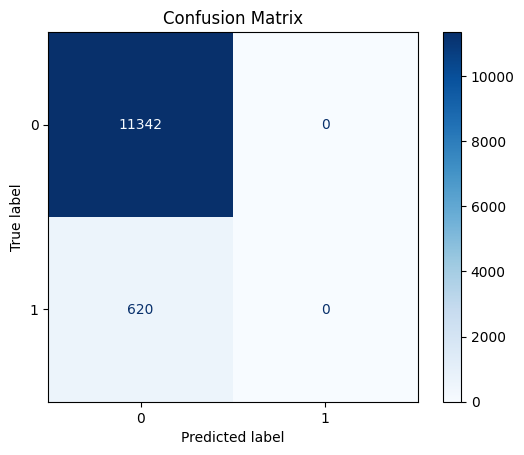

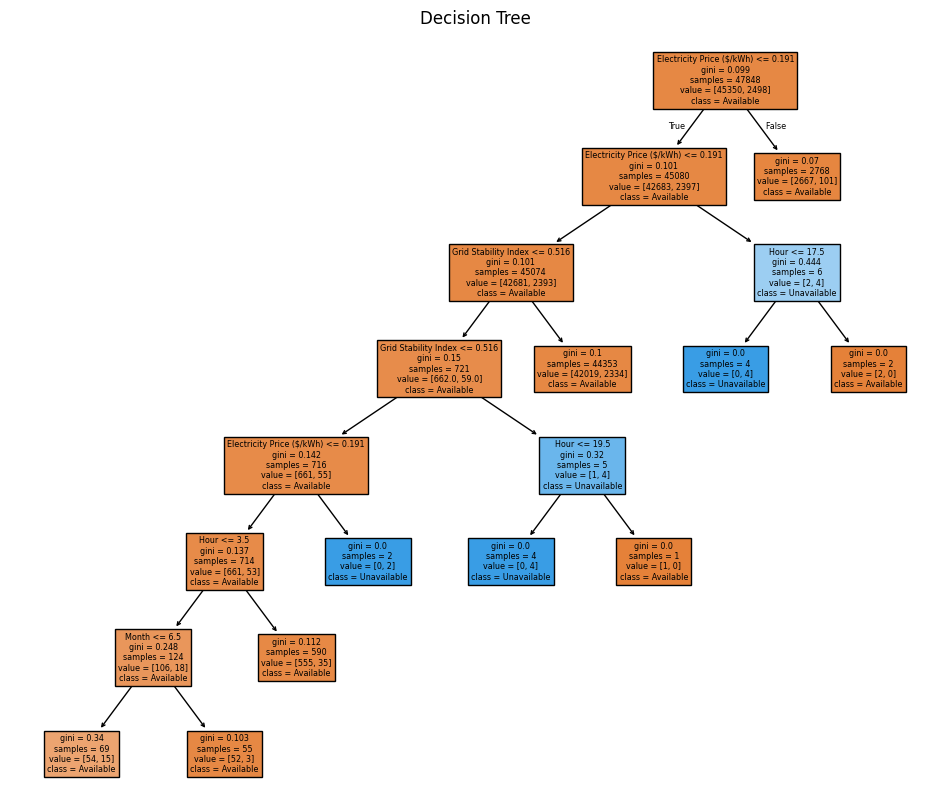

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X = df_dt[['Electricity Price ($/kWh)','Hour','Month','Grid Stability Index']]
y = df_dt['Grid Availability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = DecisionTreeClassifier(max_leaf_nodes=10,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(12,10))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in model.classes_], filled=True)
plt.title("Decision Tree")
plt.show()



**Summary of the Decision Tree Output (Grid Availability Prediction):**

1. **Most Important Feature:**  
   - The first and most important split is on **Electricity Price ($/kWh)**. If the price is low (≤ 0.191), the grid is likely to be **Available**.

2. **Secondary Features:**  
   - If the price is low, the next important feature is **Grid Stability Index**. Higher stability increases the chance of grid availability.
   - If the price is high, the grid is more likely to be **Unavailable**.

3. **Further Splits:**  
   - For cases with borderline stability, the tree checks **Hour** and **Month** to further refine the prediction.
   - Certain hours (e.g., Hour > 17.5 or Hour > 19.5) and months (e.g., Month > 6.5) can indicate a higher risk of grid unavailability.

4. **Class Colors:**  
   - **Orange nodes** represent the class **Available**.
   - **Blue nodes** represent the class **Unavailable**.

5. **Gini Index:**  
   - Lower Gini values (closer to 0) at the leaves indicate pure predictions (all samples in that node belong to one class).

---

**Key Takeaways:**
- **Low electricity price and high grid stability** are strong indicators of grid availability.
- **High price, low stability, certain hours, and certain months** increase the risk of grid unavailability.
- The tree uses a combination of price, stability, hour, and month to make its predictions.


---

**Summary:**  
- **Low electricity price (≤ 0.191) and high grid stability (≤ 0.516) with early hours and lower months mostly lead to "Available".**
- **High price, low stability, or certain hours/months increase the chance of "Unavailable".**
- **Each split shows the number of samples and the class distribution at that node.**